In [191]:
%matplotlib inline

In [192]:
import pandas as pd
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
import pywt

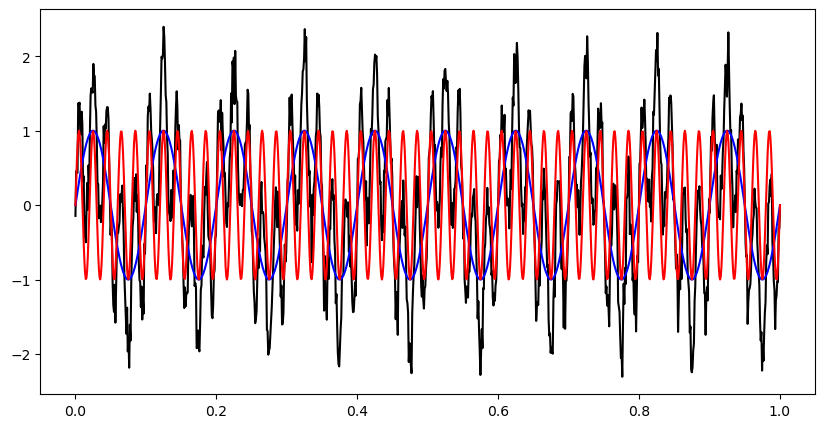

In [2]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()


In [3]:
wvlt = pywt.Wavelet('dmey')

In [4]:
pywt.dwt_max_level(len(F), wvlt)

4

In [5]:
cA4, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=4)

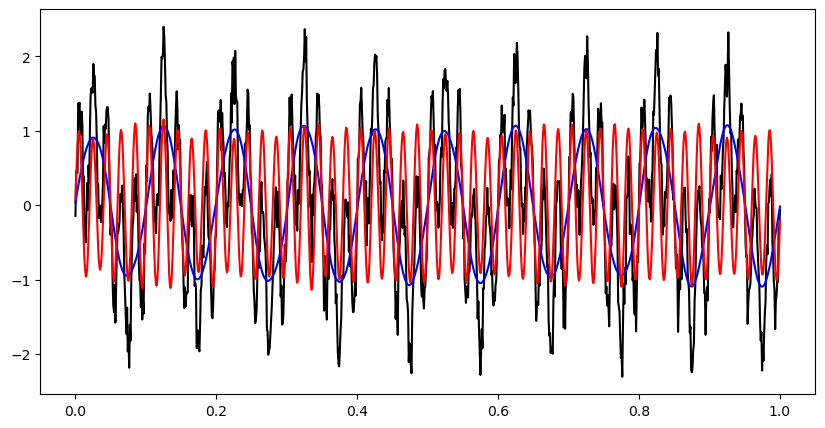

In [6]:
Fre = pywt.waverec((cA4, None, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD4, None, None, None), wvlt, mode='periodization')
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, Fre, 'b') # это будет первая периодика
plt.plot(t, Fre2, 'r') # это будет вторая периодика
plt.show()

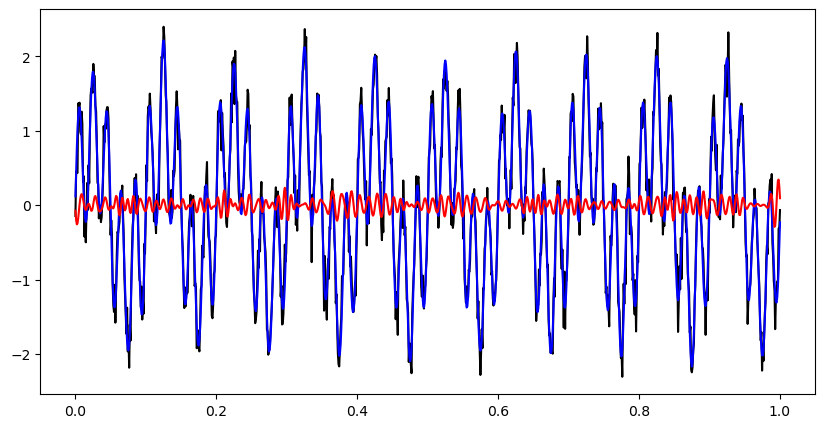

In [7]:
cA3, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=3)

Fre1 = pywt.waverec((cA3, None, None, None), wvlt, mode='periodization')
Fre21 = pywt.waverec((None, cD3, None, None), wvlt, mode='periodization')
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, Fre1, 'b') # это будет первая периодика
plt.plot(t, Fre21, 'r') # это будет вторая периодика
plt.show()

Вариант 10


In [8]:
wvlt = pywt.Wavelet('haar')
lvl = pywt.dwt_max_level(len(F), wvlt)


In [9]:
wv_dec = pywt.wavedec(F, wvlt, mode='periodic', level=lvl)

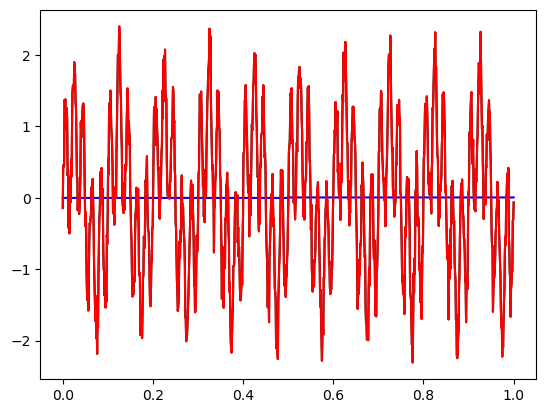

In [10]:
v10 = pywt.waverec((None, wv_dec[1], None, None, None, None, None, None, None, None, None), wvlt, mode='periodic')
v11 = pywt.waverec(wv_dec, wvlt, mode='periodic')
plt.plot(t, F, 'k')
plt.plot(t, v10, 'b') # это будет первая периодика
plt.plot(t, v11, 'r')
plt.show()

14 задание

In [11]:
wp = pywt.WaveletPacket(data=F, wavelet='dmey', mode='periodization')
print([node.path for node in wp.get_level(4, 'freq')]) # выводим все комбинации узлов, упорядоченные по их частотной ширине спектра

['aaaa', 'aaad', 'aadd', 'aada', 'adda', 'addd', 'adad', 'adaa', 'ddaa', 'ddad', 'dddd', 'ddda', 'dada', 'dadd', 'daad', 'daaa']


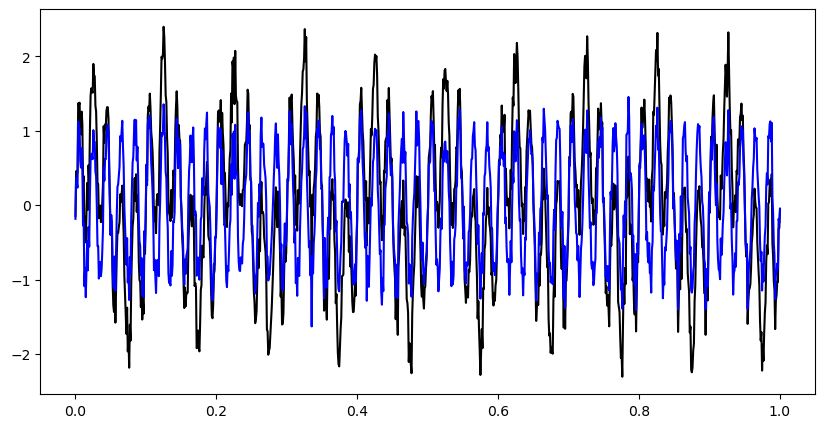

In [12]:
del wp['aaaa'] # удалим самый «глубокий» узел
reF = wp.reconstruct() # и восстановим ряд …
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF, 'b') # получим нечто периодическое, плохого качества
plt.show()

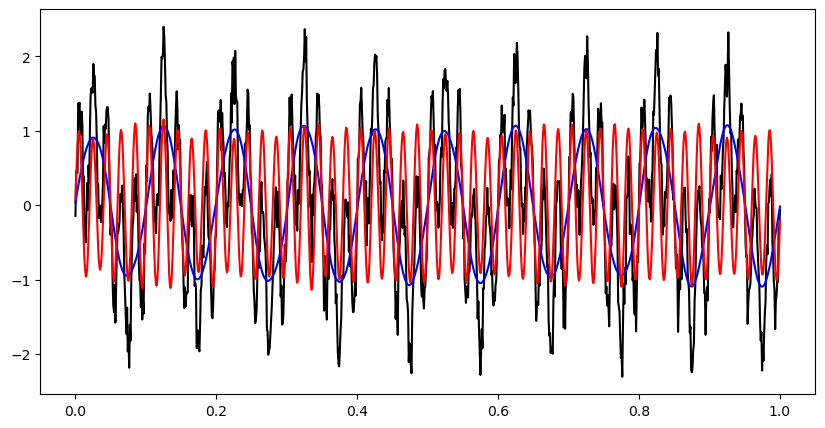

In [13]:
wp = pywt.WaveletPacket(data=F, wavelet='dmey', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization')
new_wp['aaaa'] = wp['aaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization')
new_wp['aaad'] = wp['aaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF1, 'b') # компонента 1
plt.plot(t, reF2, 'r') # компонента 2
plt.show()

17 задание

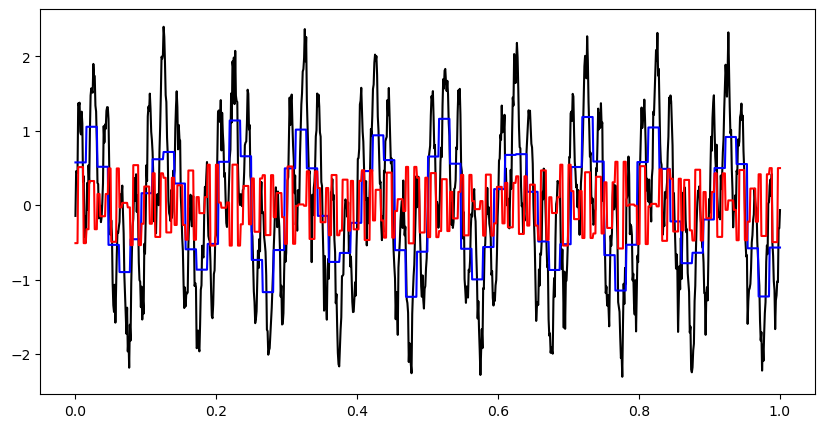

In [14]:
wp = pywt.WaveletPacket(data=F, wavelet='haar', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='haar', mode='periodization')
new_wp['aaaa'] = wp['aaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1
new_wp = pywt.WaveletPacket(data=None, wavelet='haar', mode='periodization')
new_wp['aadd'] = wp['aadd'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF1, 'b') # компонента 1
plt.plot(t, reF2, 'r') # компонента 2
plt.show()

18 задание

In [15]:
def Dwt(data: list, wvlt: str, Mode: str = 'periodization', num:list = [], level = None):
    wvlt = pywt.Wavelet(wvlt)
    if level is None:
        level = pywt.dwt_max_level(len(data), wvlt)
    res = pywt.wavedec(data, wvlt, mode = Mode, level = level)
    # первый элемент стартует с 1
    if len(num) == 1: # подразумевает, что берётся несколько элементов друг за другом идущих
        res[num[0]:] = [None] * (len(res) - 1)
    elif len(num) > 1: # если нужно взять не все элементы массива, а только некоторые
        arr = {}
        for i in num:
            arr[i] = res[i]
        res[:] = [None] * len(res)
        for i in arr:
            res[i] = arr[i]
    else:
        return res
            
    return pywt.waverec(res, wvlt, mode = Mode)
        

def Wpd(data: list, wvlt: str, Mode: str = 'periodization'):
    wvlt = pywt.Wavelet(wvlt)
    res = pywt.WaveletPacket(data = data, wavelet = wvlt, mode = Mode)
    return res

DWT haar

 1


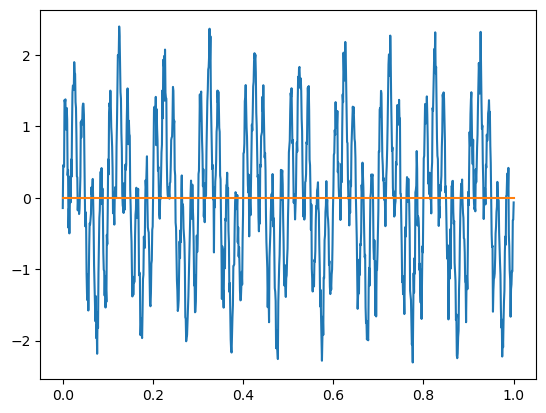

In [16]:
numer = list(map(int, input().split(',')))
res = Dwt(F, 'haar', num = numer, Mode = 'constant')
plt.plot(t, F)
plt.plot(t, res)
plt.show()

DWT dmey

 1


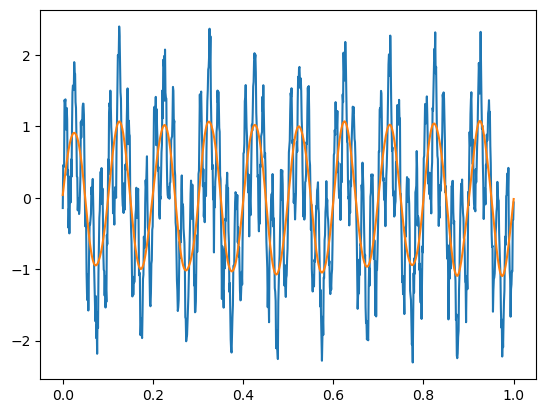

In [17]:
numer = list(map(int, input().split(',')))
res = Dwt(F, 'dmey', num = numer)
plt.plot(t, F)
plt.plot(t, res)
plt.show()

WPD haar

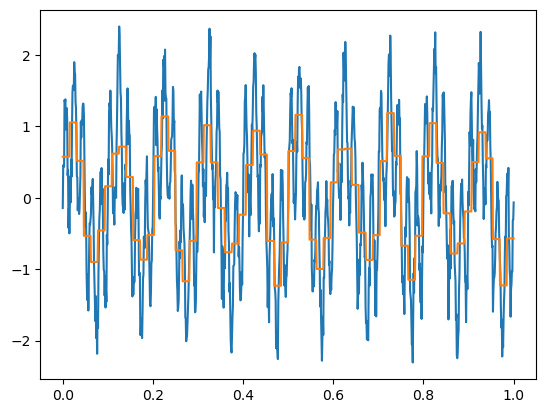

In [18]:
res = Wpd(F, 'haar')
branch_1 = Wpd(None, 'haar')
branch_1['aaaa'] = res['aaaa'].data
branch_1.reconstruct(update = True)
plt.plot(t, F)
plt.plot(t, branch_1.data)
plt.show()

WPD dmey

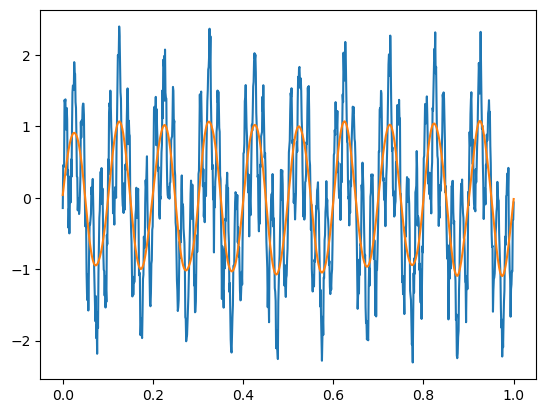

In [19]:
res = Wpd(F, 'dmey')
branch_1 = Wpd(None, 'dmey')
branch_1['aaaa'] = res['aaaa'].data
branch_1.reconstruct(update = True)
plt.plot(t, F)
plt.plot(t, branch_1.data)
plt.show()

19 задание

In [151]:
t = np.linspace(0, 1, 4096)
xf = np.zeros(4096)


DWT haar

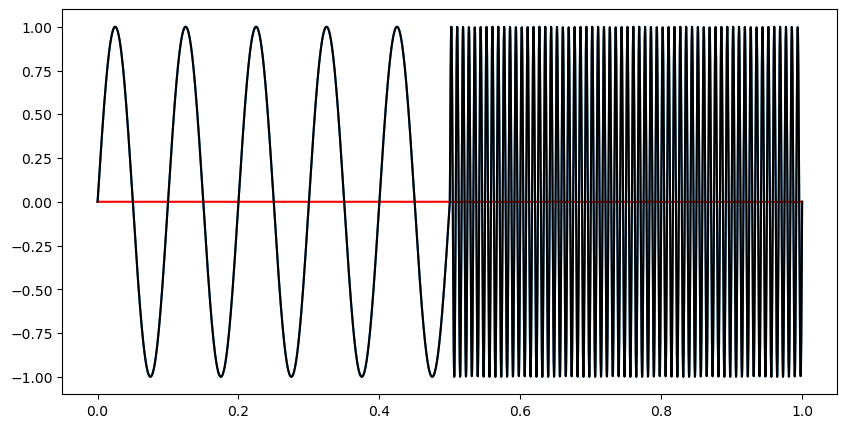

In [39]:
res = Dwt(xf, 'haar')
arr = [None] * len(res)
arr[1] = res[1]
a = pywt.waverec(arr, pywt.Wavelet('haar'), mode = 'periodization')
a1 = pywt.waverec(res, pywt.Wavelet('haar'), mode = 'periodization')

plt.figure(figsize = (10, 5))
plt.plot(t, xf)
plt.plot(t, a, c = 'r')
plt.plot(t, a1, c = 'k')
plt.show()



DWT dmey

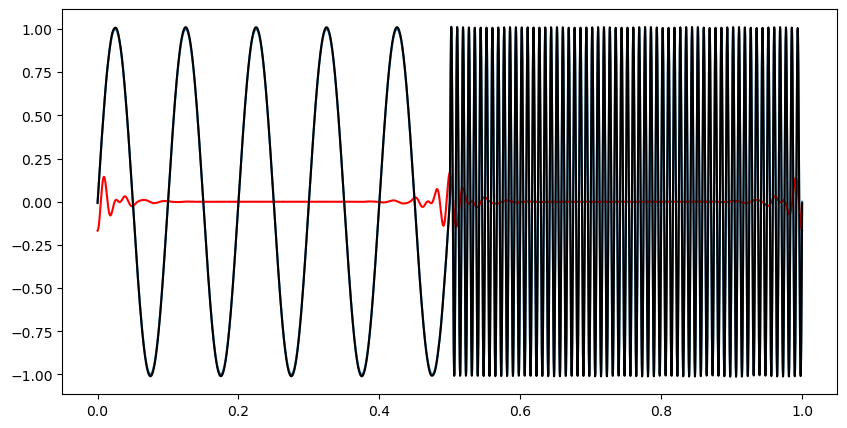

In [40]:
res = Dwt(xf, 'dmey')
arr = [None] * len(res)
arr[1] = res[1]
a = pywt.waverec(arr, pywt.Wavelet('dmey'), mode = 'periodization')
a1 = pywt.waverec(res, pywt.Wavelet('dmey'), mode = 'periodization')

plt.figure(figsize = (10, 5))
plt.plot(t, xf)
plt.plot(t, a, c = 'r')
plt.plot(t, a1, c = 'k')
plt.show()


WPD haar

In [41]:
#def Wpd(data: list, wvlt: str, Mode: str = 'periodization'):

In [42]:
# xf = Wpd(F, 'dmey')
# [node.path for node in xf.get_level(4, 'freq')]

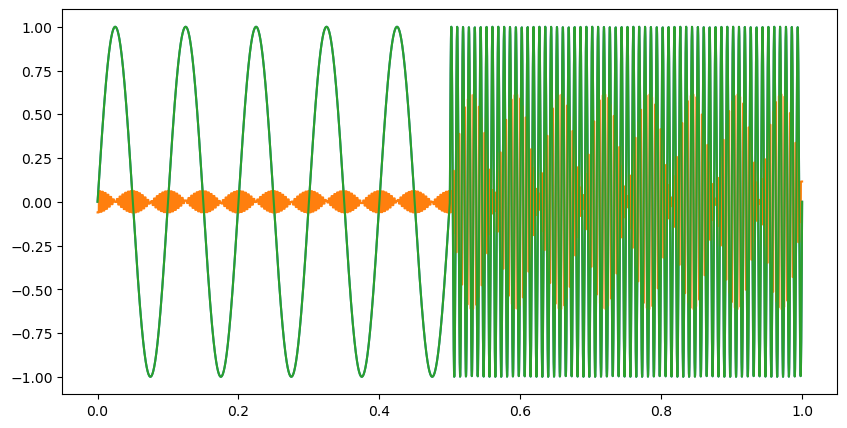

In [43]:
wvlt = 'haar'
wp = Wpd(xf, wvlt)
new_wp = Wpd(None, wvlt)
new_wp['aaad'] = wp['aaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 2
wp = wp.reconstruct()


plt.figure(figsize = (10, 5))
plt.plot(t, xf)
plt.plot(t, reF1)
plt.plot(t, wp)
plt.show()

WPD dmey

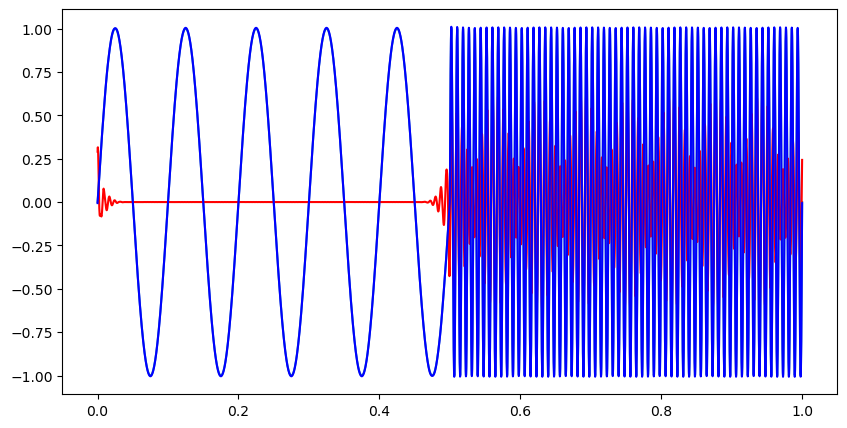

In [49]:
wvlt = 'dmey'
wp = Wpd(xf, wvlt)
new_wp = Wpd(None, wvlt)
new_wp['aaad'] = wp['aaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 2
wp = wp.reconstruct()


plt.figure(figsize = (10, 5))
plt.plot(t, xf)
plt.plot(t, reF1, c = 'r')
plt.plot(t, wp, c = 'b')
plt.show()

20 задание

In [227]:
def exp_dwt(Fexp, wavelet, level = 8):
    
    wvlt = pywt.Wavelet(wavelet)

    res = pywt.wavedec(Fexp, wvlt, level = level)
    
    for i in range(1, len(res)):
        res[i] = pywt.threshold(res[i], 2 * np.max(res[i]), mode='soft')
    
    # res_a = pywt.threshold(res[0], np.max(res[0]), mode='hard')
    
    filt_y = pywt.waverec(res, wavelet)
    # filt_y = pywt.waverec([res_a] + [None] * (len(res) - 1), wavelet)
    
    plt.plot(Fexp)
    plt.plot(filt_y, c = 'r')
    plt.show()



DWT haar

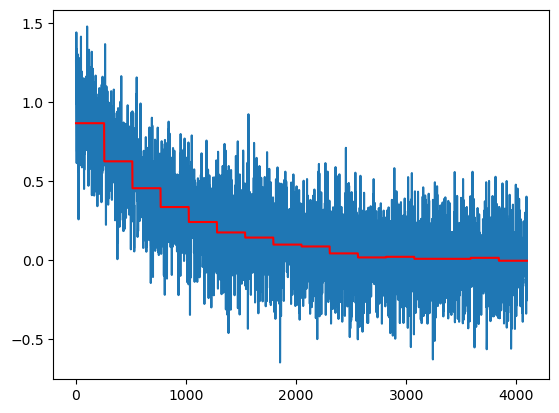

In [228]:
t = np.linspace(0, 4, 4096)
Fexp = np.exp(-0.4*np.pi*t) + 0.2*rand.randn(len(t))

exp_dwt(Fexp, 'haar', level = 8)

DWT dmey

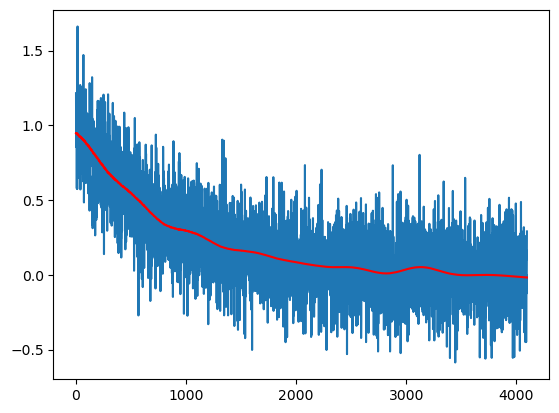

In [219]:
exp_dwt(Fexp, 'dmey')

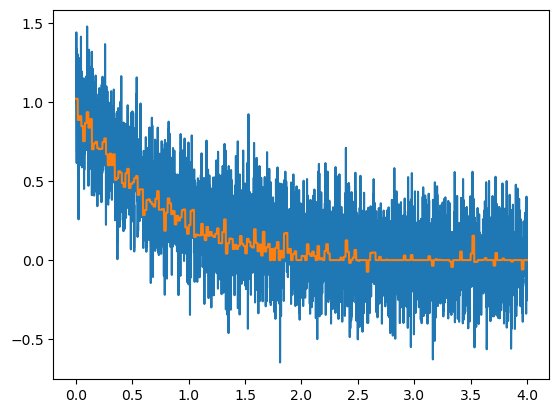

In [280]:
res = pywt.WaveletPacket(Fexp, 'haar', 'periodization')
new_res = pywt.WaveletPacket(data=None, wavelet = 'haar', mode = 'periodization')
new_res['aaaa'] = res['aaaa']
new_res['aaad'] = res['aaad']
new_res['aaaa'].data = pywt.threshold(new_res['aaaa'].data, 0.05 * np.max(new_res['aaaa'].data), mode='soft')
new_res['aaad'].data = pywt.threshold(new_res['aaad'].data, 2 * np.max(new_res['aaad'].data), mode='soft')
new_res.reconstruct(update = True)
lv = new_res.data

plt.plot(t, Fexp)
plt.plot(t, lv)

WPD haar

WPD dmey

21 задание

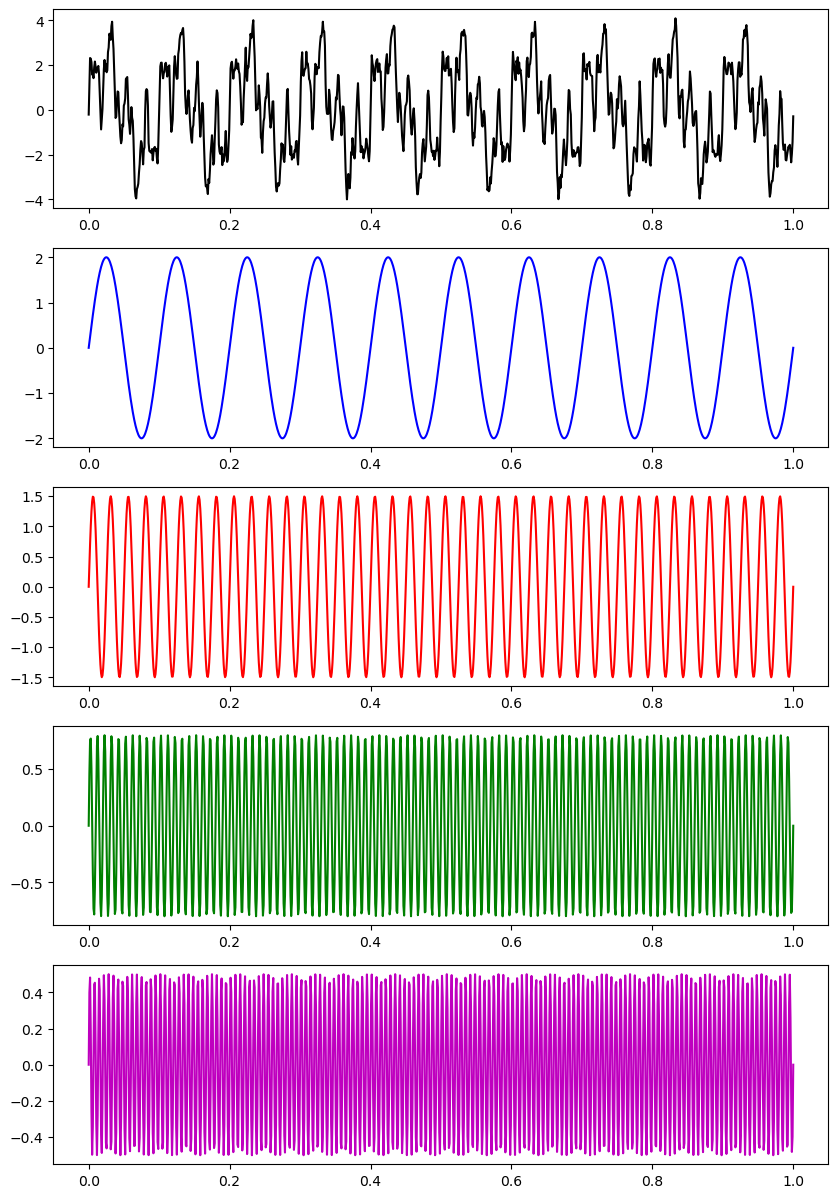

In [28]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi \
*f3*t)+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 15))
plt.subplot(5,1,1)
plt.plot(t, F, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.show()


22-23 задания

In [29]:
from scipy import signal

In [119]:
def perebor(data, wvl, level = 8):
    
    wvlt = pywt.Wavelet(wvl)
    res = pywt.wavedec(data, 'haar', level = 8)
    arr = [None] * len(res)
    lv = []
    arr[0] = res[0]
    lv.append(pywt.waverec(arr, wvlt, mode = 'periodization'))
    arr[0] = None
    for i in range(1, len(res)):
        if i == 1:
            arr[1] = res[i] 
            lv.append(pywt.waverec(arr, wvlt, mode = 'periodization'))
        else:
            arr.pop()
            arr[1] = res[i]
            lv.append(pywt.waverec(arr, wvlt, mode = 'periodization'))

    for i in lv:
        plt.figure(figsize = (10, 5))
        plt.plot(ND, c = 'r')
        plt.plot(i)
        plt.show()

        plt.figure(figsize = (10, 5))
        pd2, pdden2 = signal.periodogram(i)
        plt.semilogy(pd2, pdden2)
        plt.show()
    
    fs = 1/(t[1]-t[0])

    for i in range(len(lv)):
        if i < 6:
            f, tx, Sxx = signal.spectrogram(lv[i], fs, nperseg = 512, noverlap = 496, nfft=4096)
            plt.figure(figsize = (10, 5))
            plt.pcolormesh(tx, f, Sxx, shading='auto')
            plt.ylim(0, 50)
        elif i < 8:
            f, tx, Sxx = signal.spectrogram(lv[i], fs, nperseg = 512, noverlap = 496, nfft=4096)
            plt.figure(figsize = (10, 5))
            plt.pcolormesh(tx, f, Sxx, shading='auto')
            plt.ylim(70, 150)
        else:
            f, tx, Sxx = signal.spectrogram(lv[i], fs, nperseg = 512, noverlap = 496, nfft=4096)
            plt.figure(figsize = (10, 5))
            plt.pcolormesh(tx, f, Sxx, shading='auto')
            plt.ylim(300, 500)

In [120]:
ND = rand.randn(10000)

DWT haar

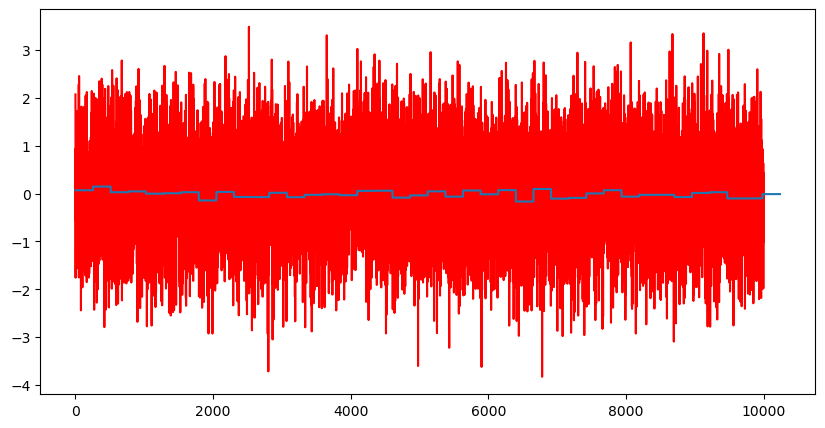

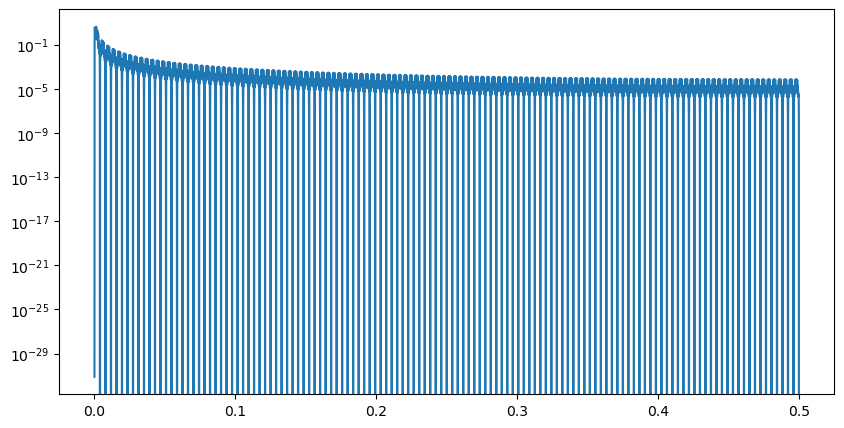

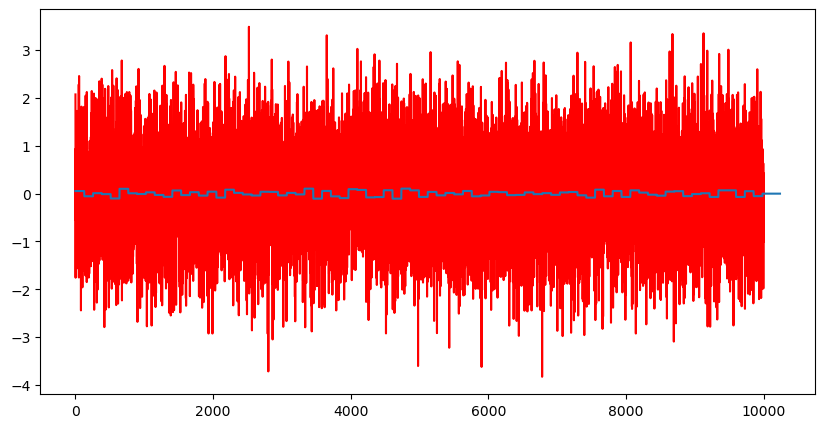

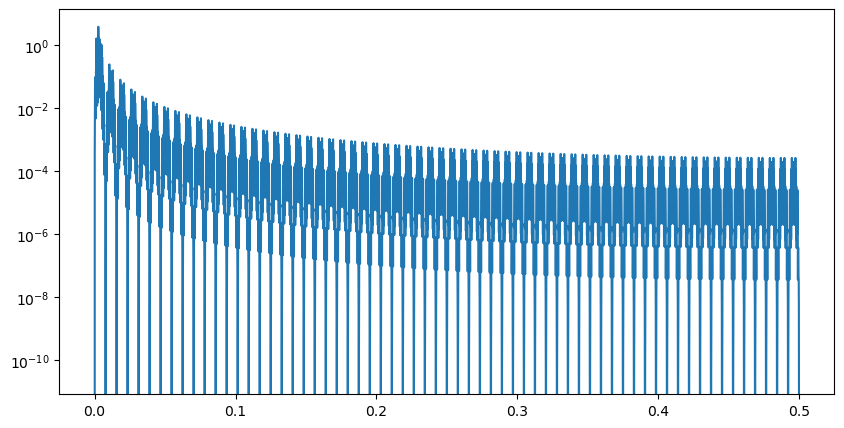

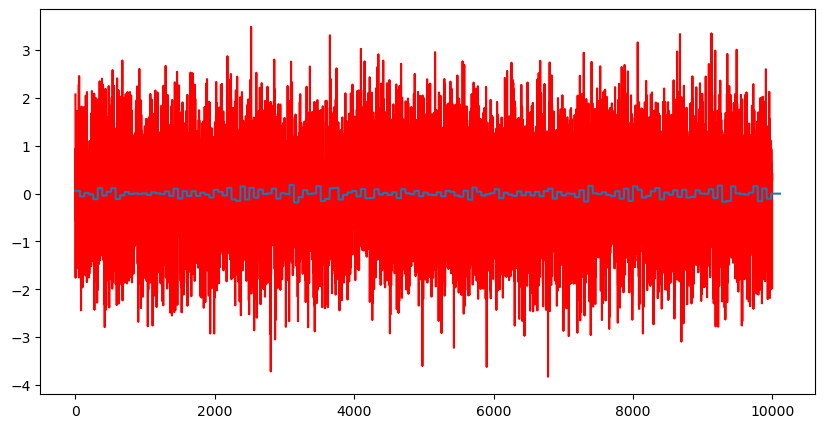

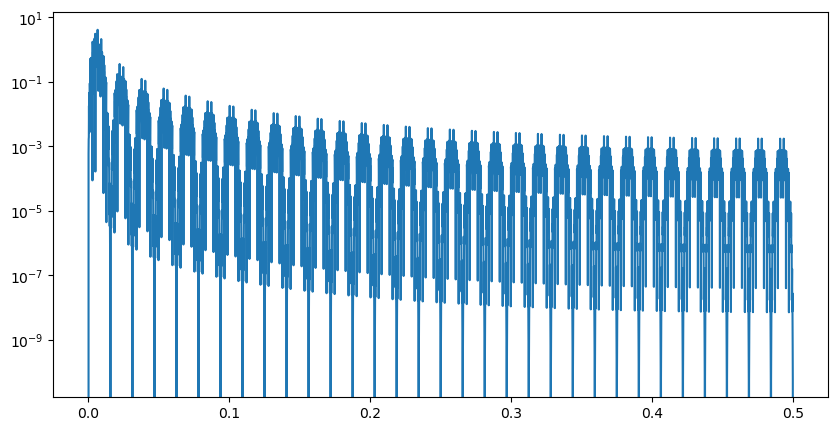

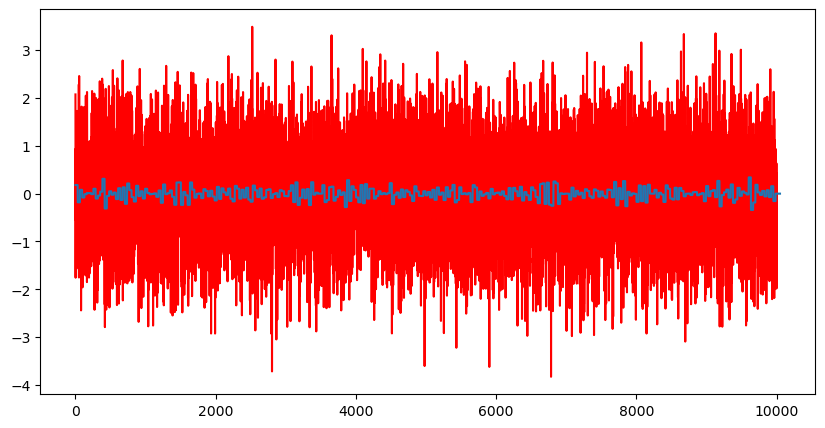

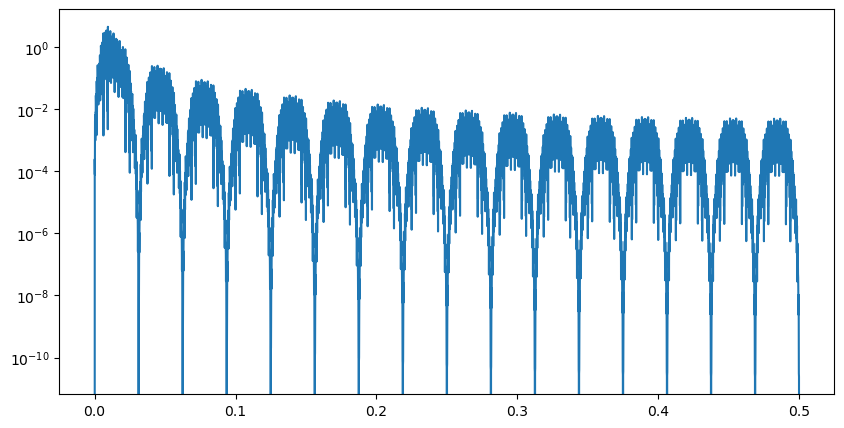

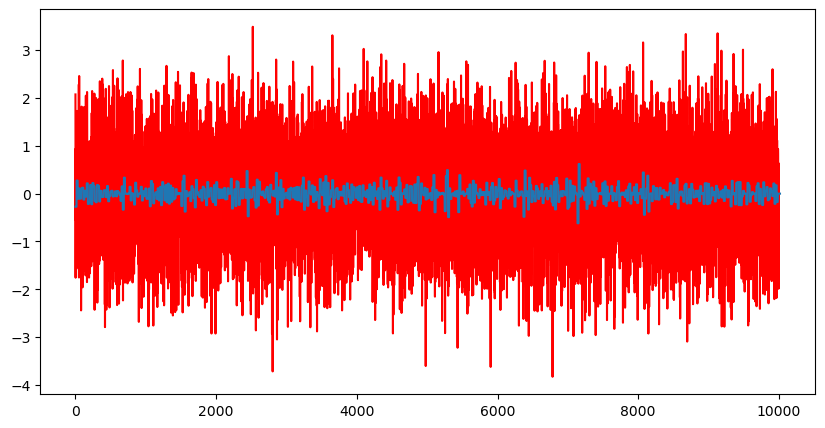

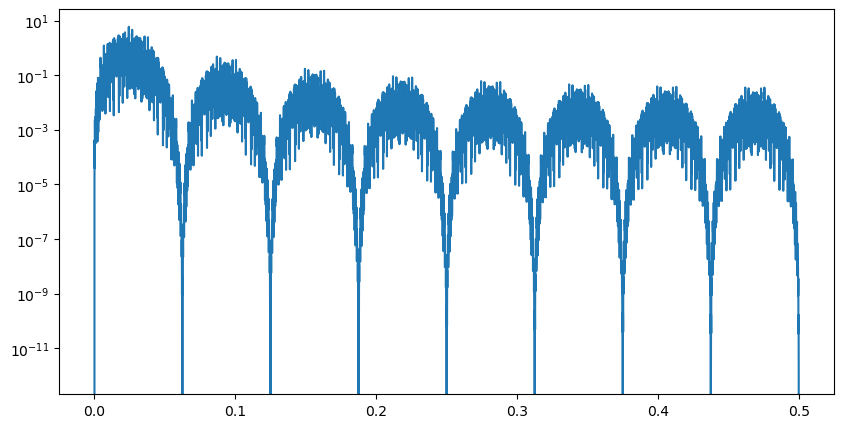

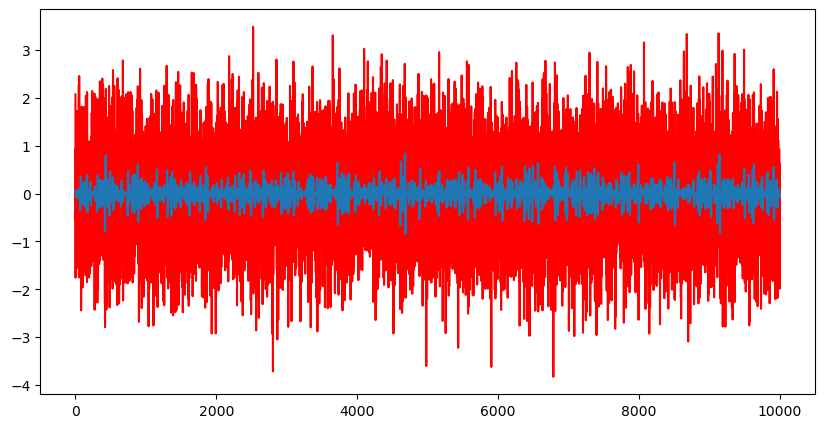

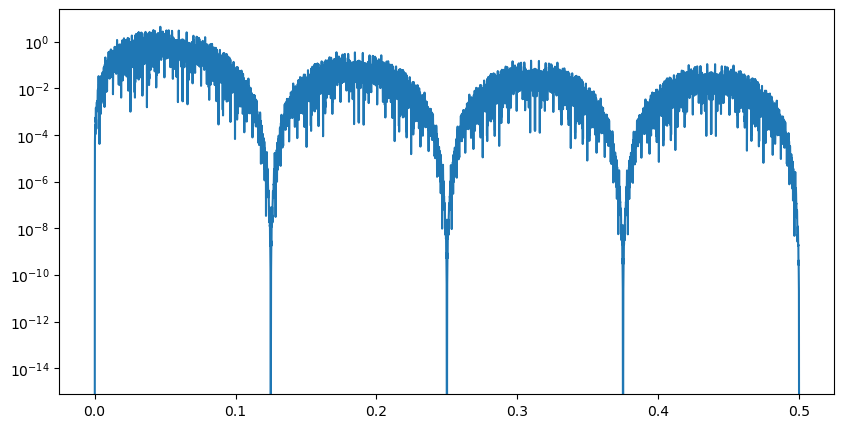

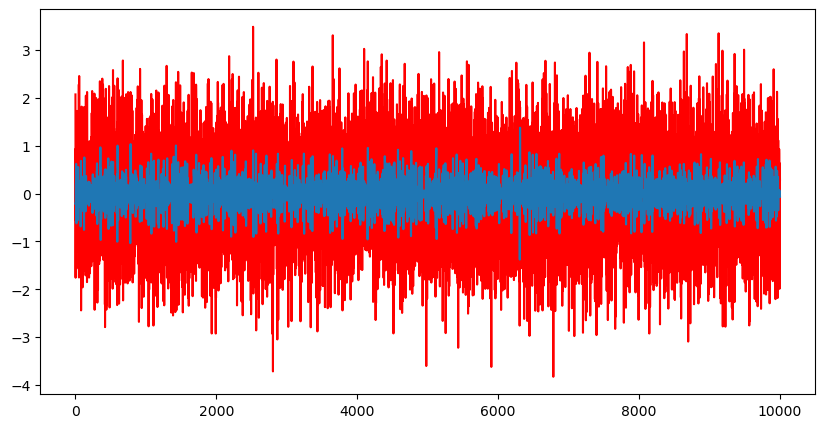

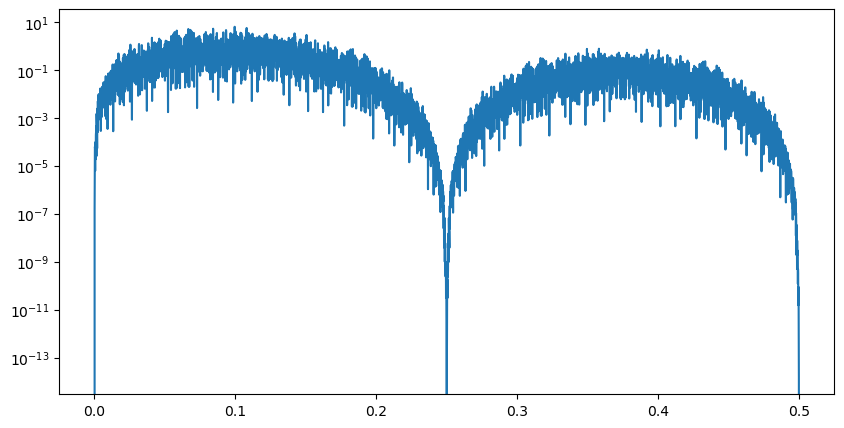

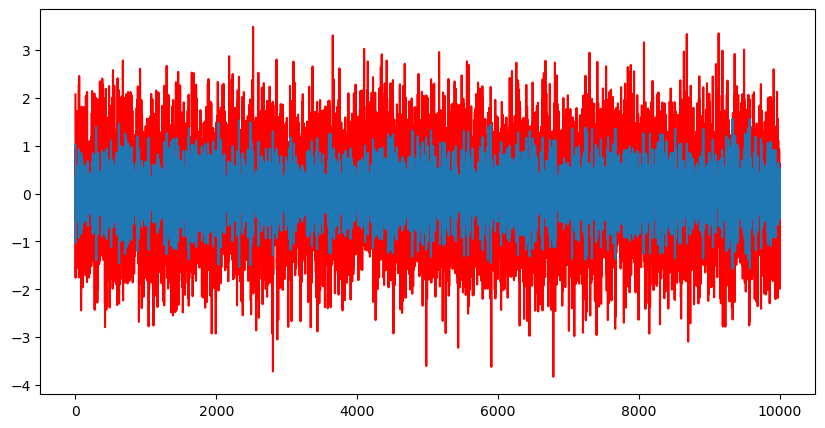

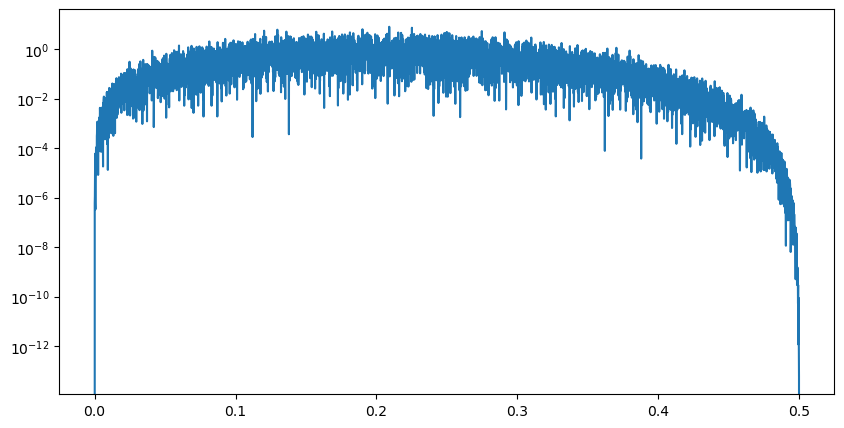

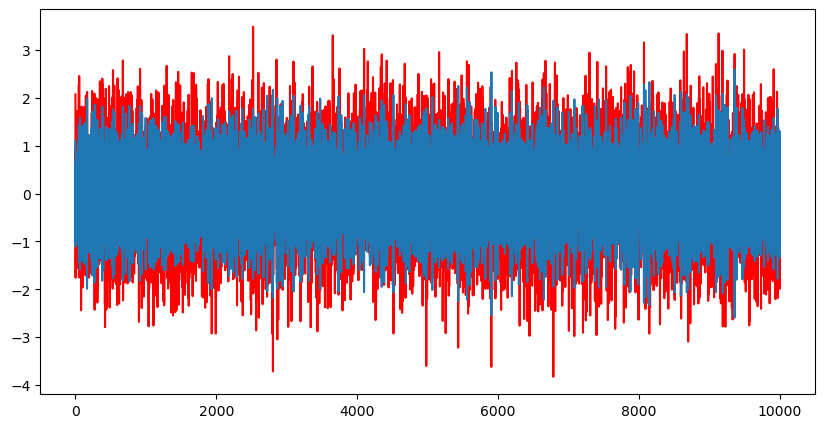

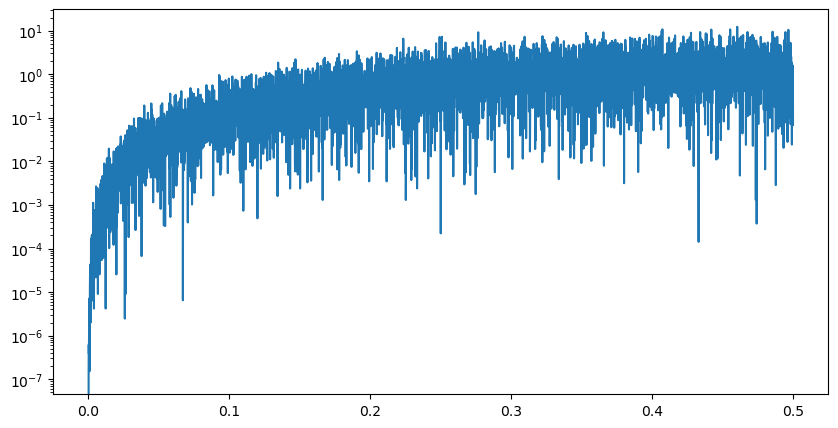

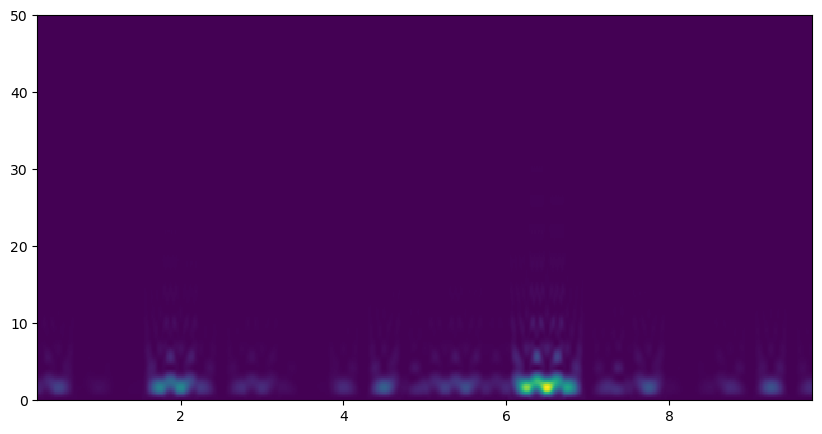

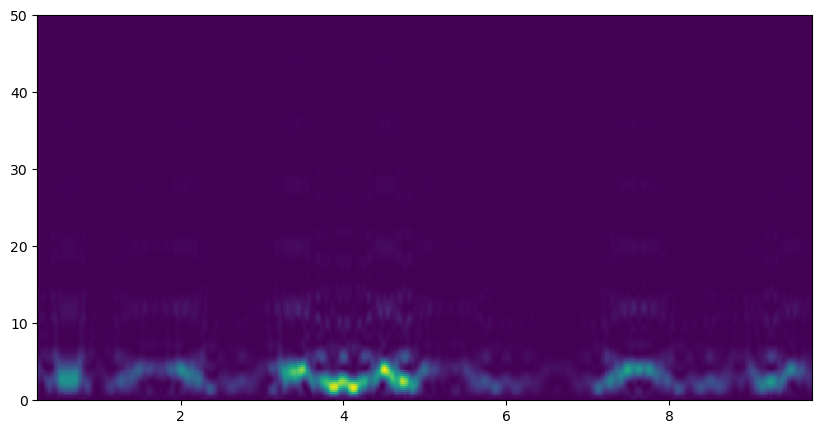

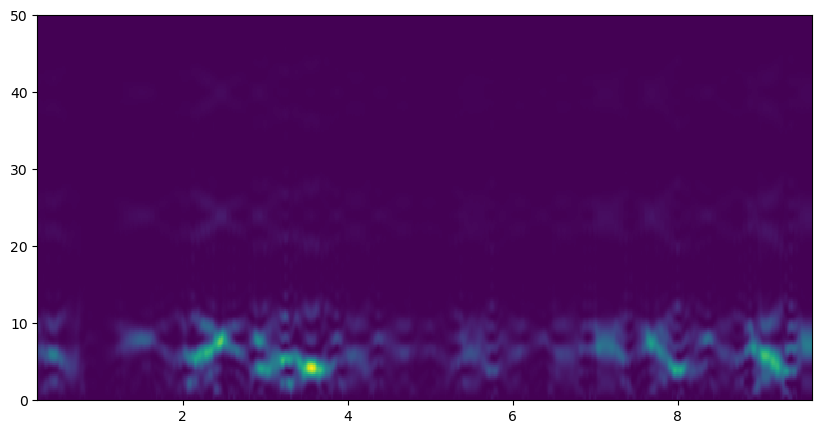

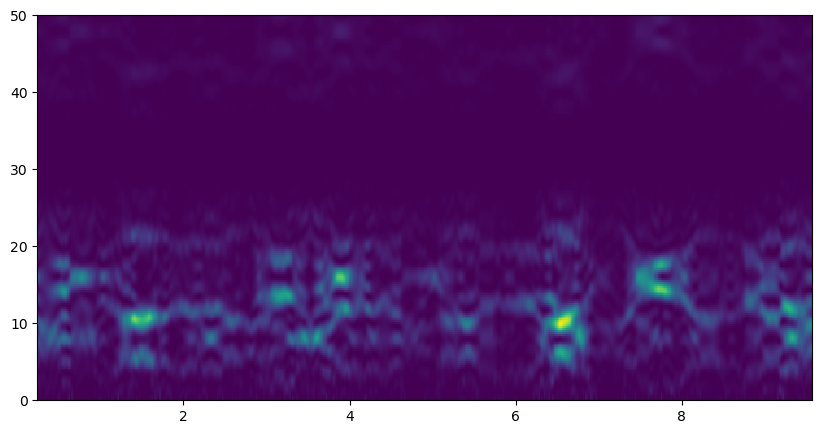

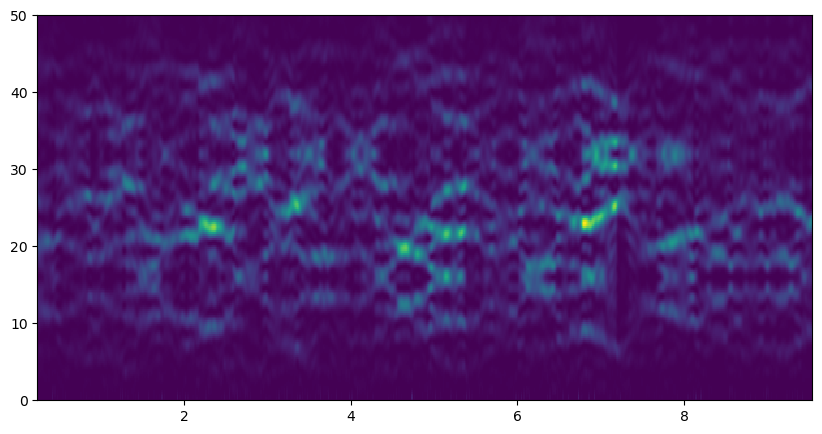

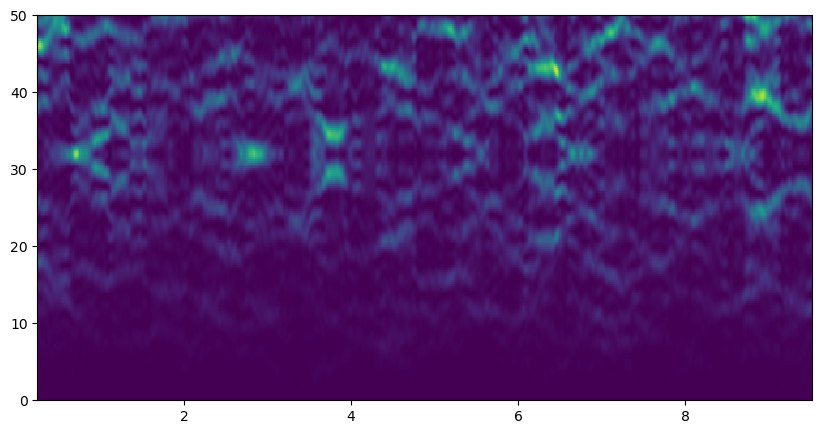

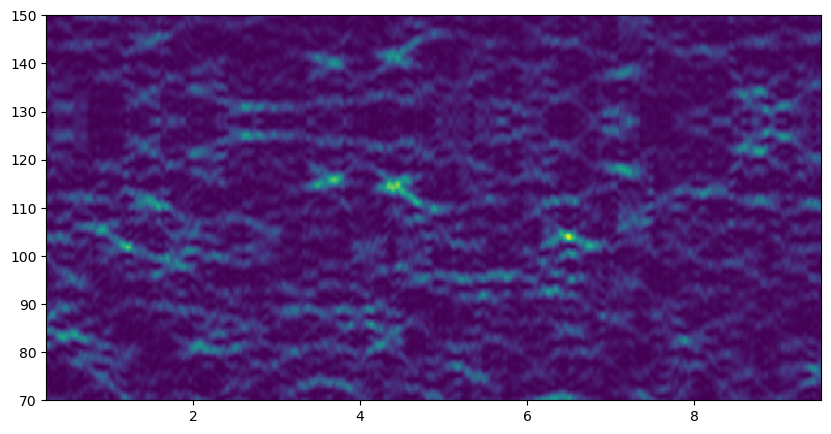

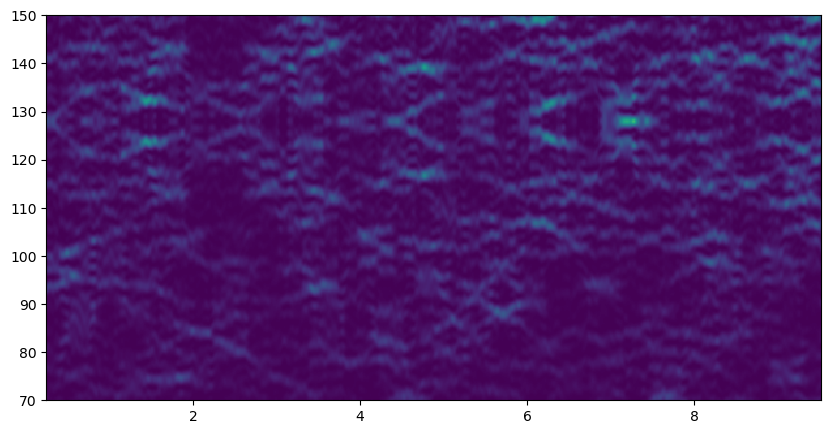

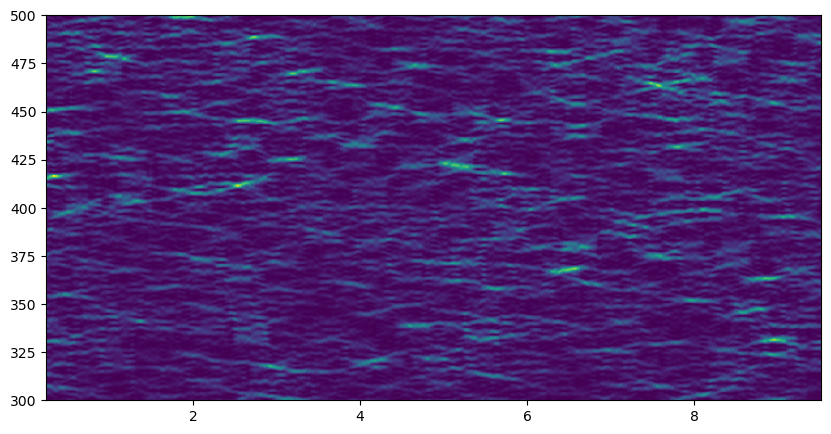

In [121]:
perebor(ND, 'haar', 9)

DWT dmey

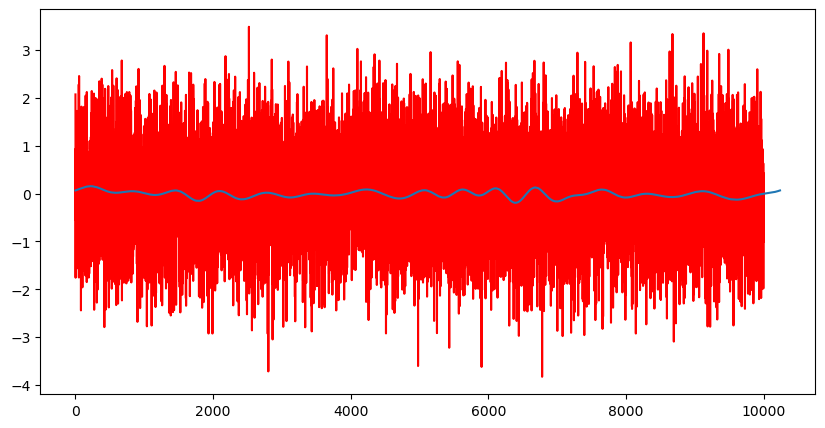

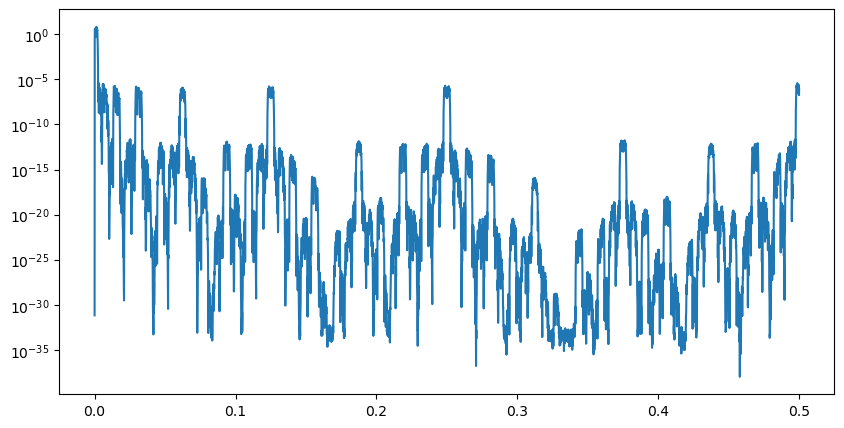

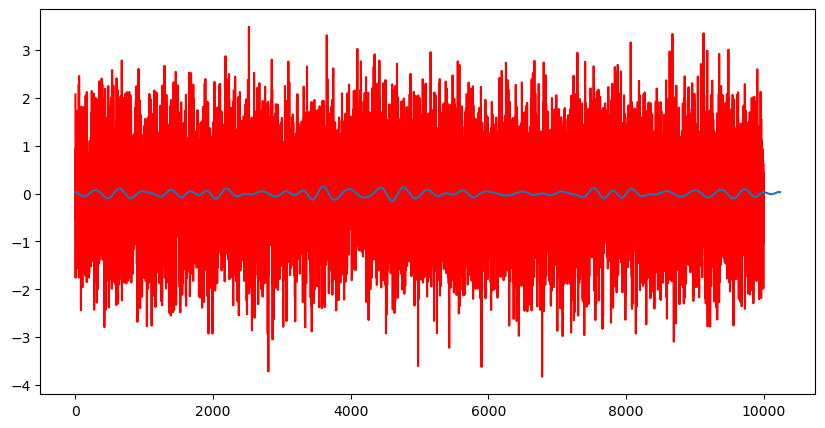

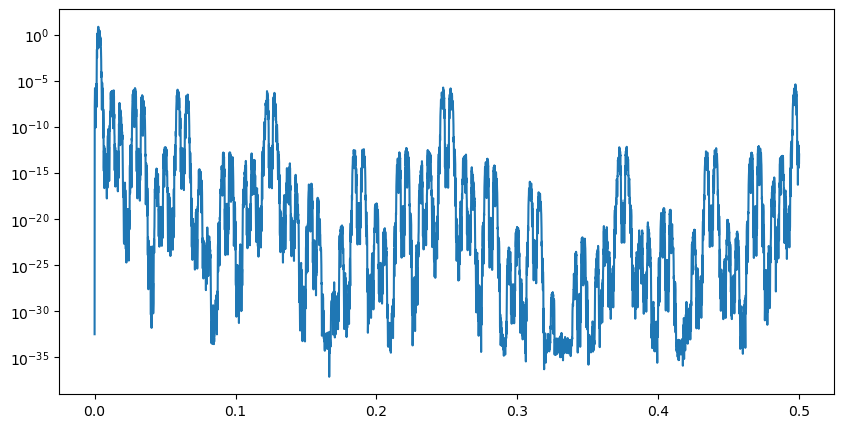

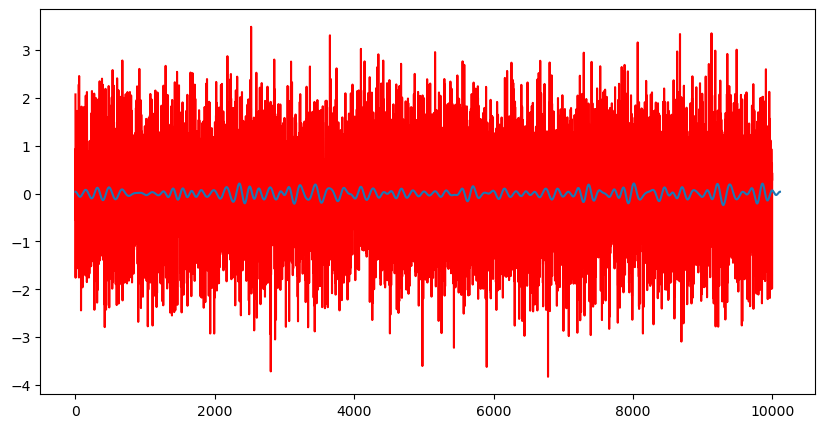

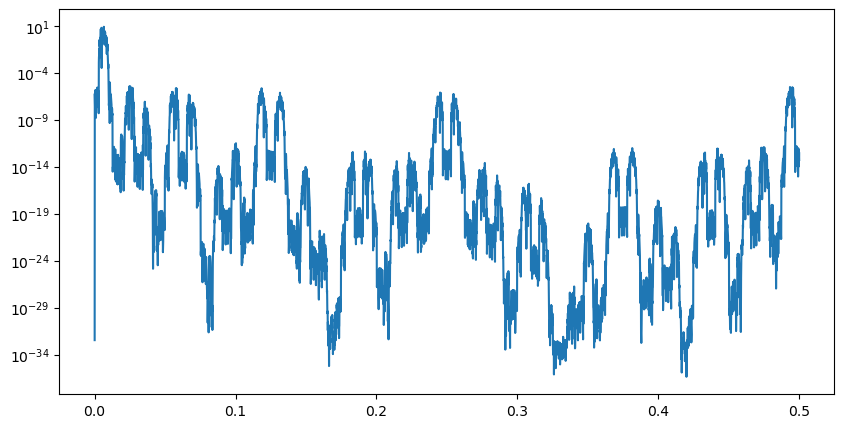

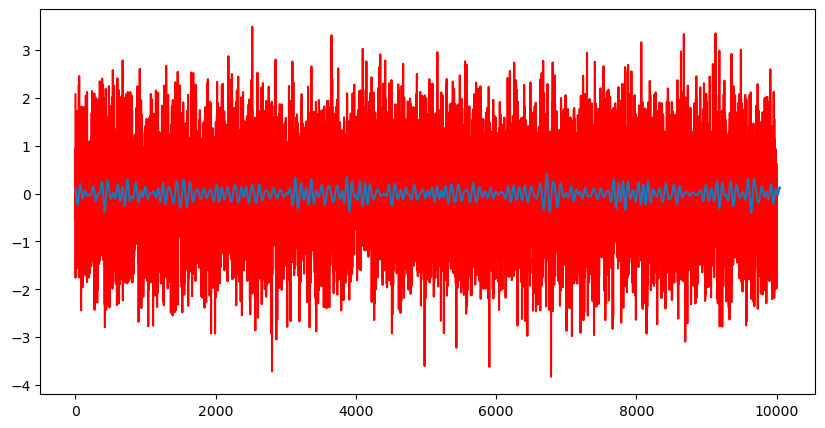

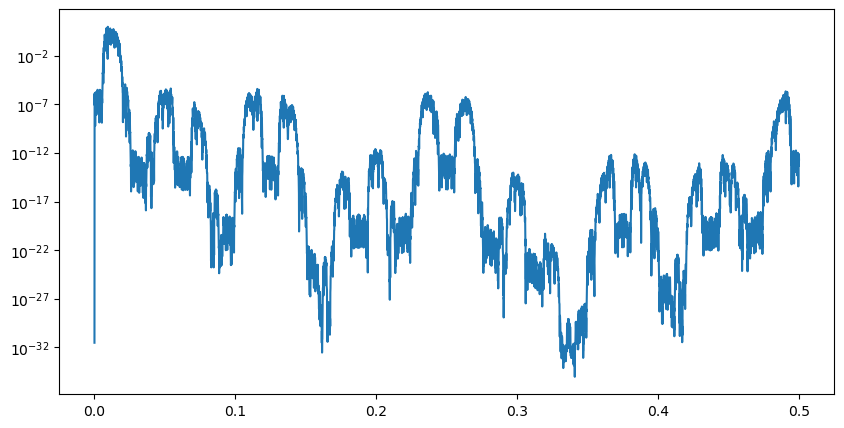

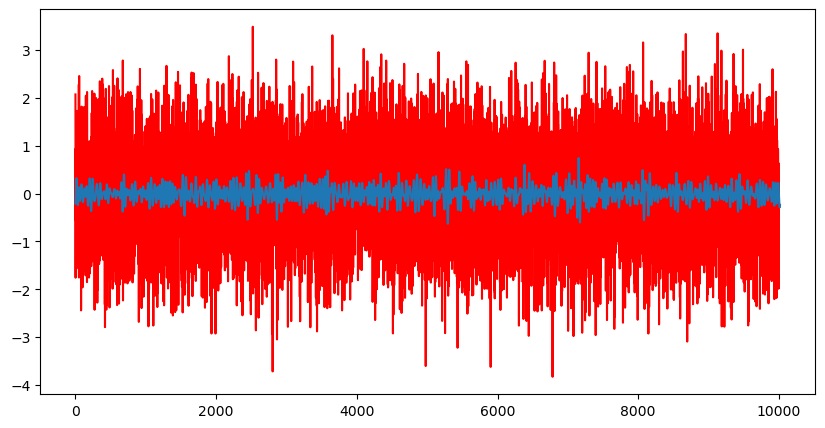

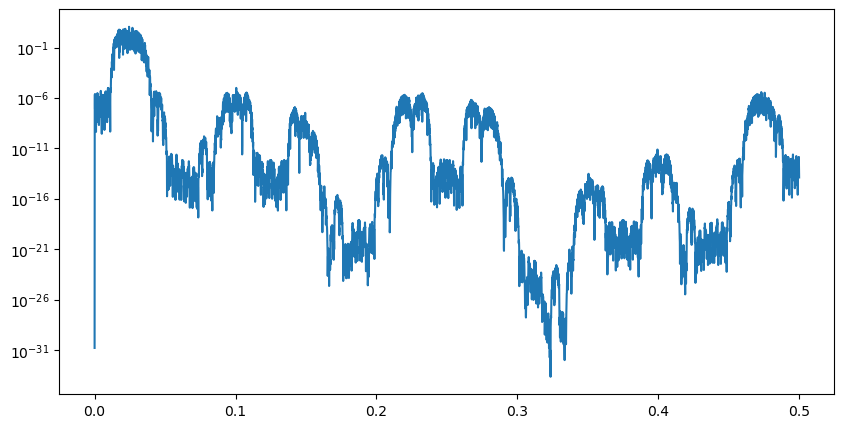

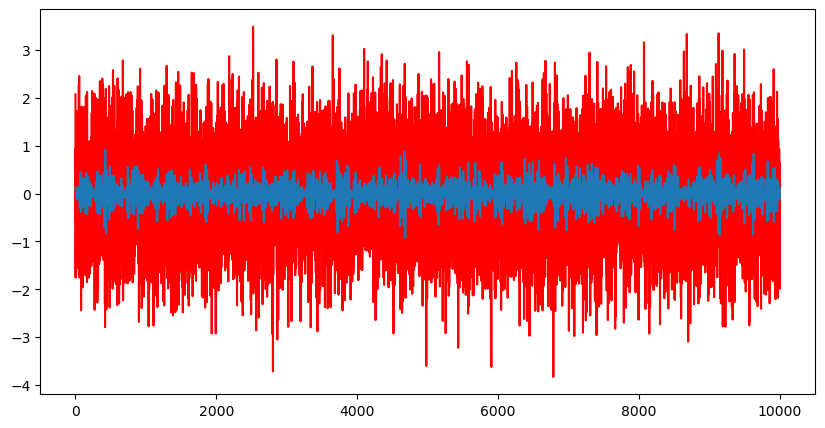

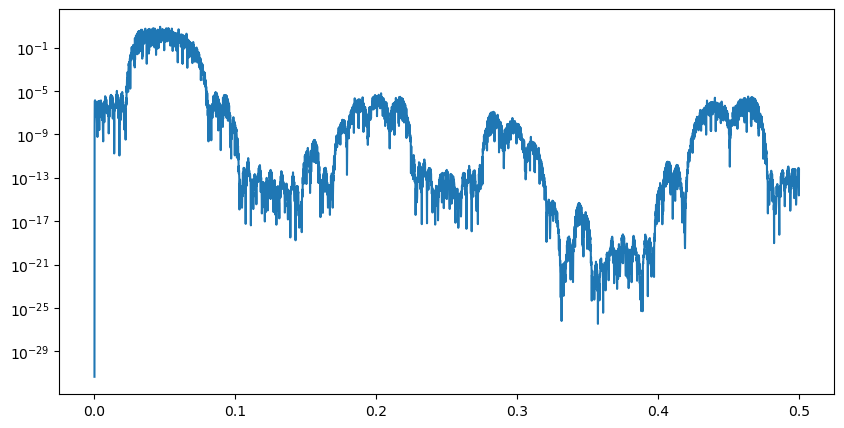

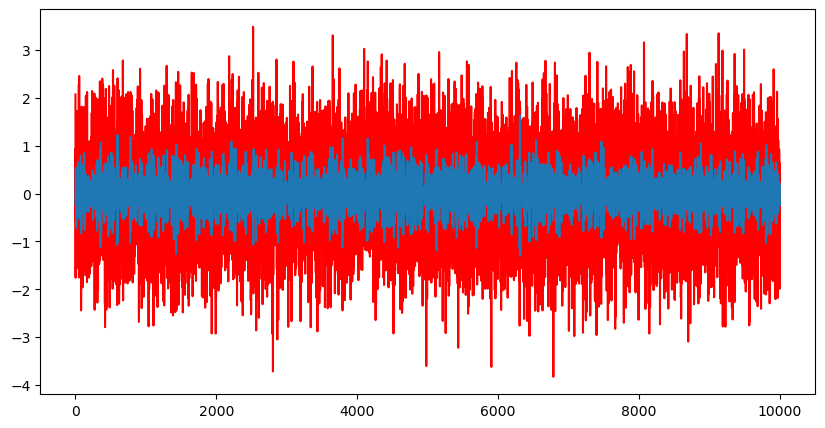

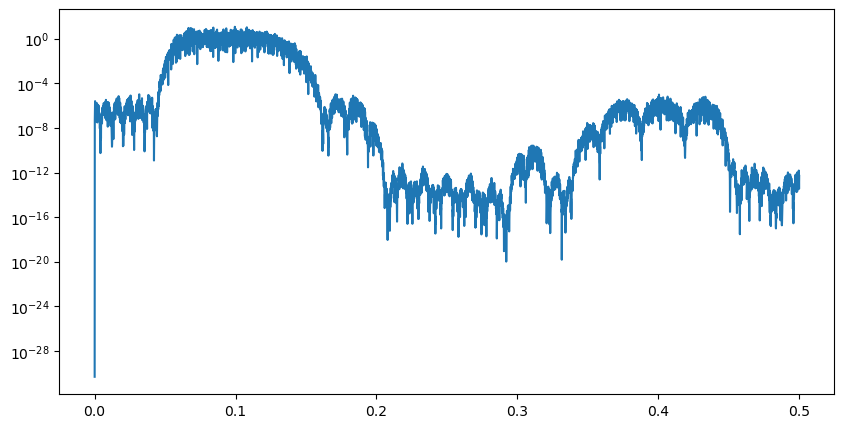

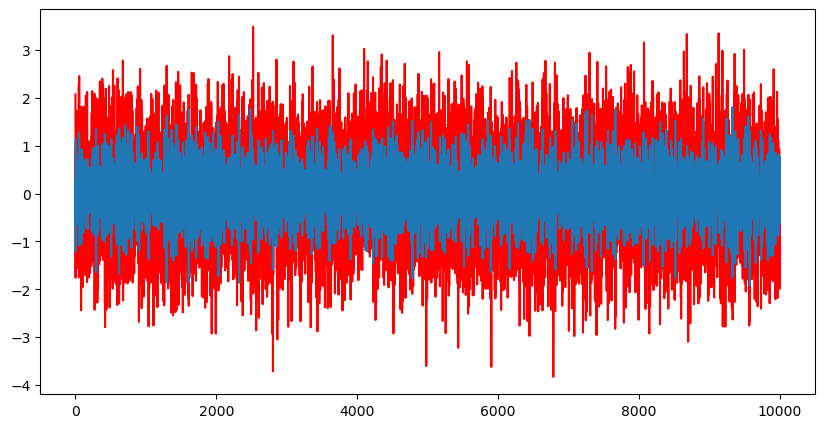

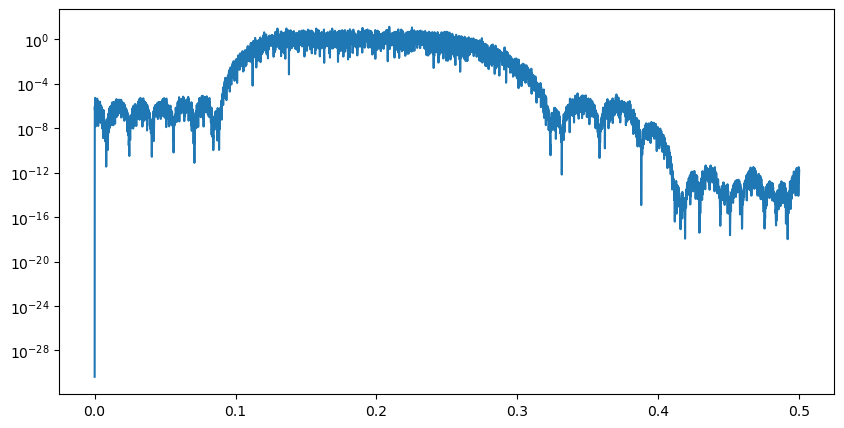

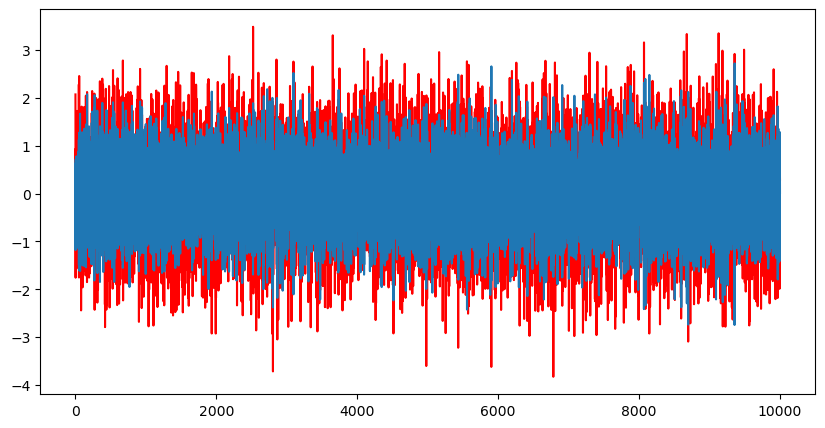

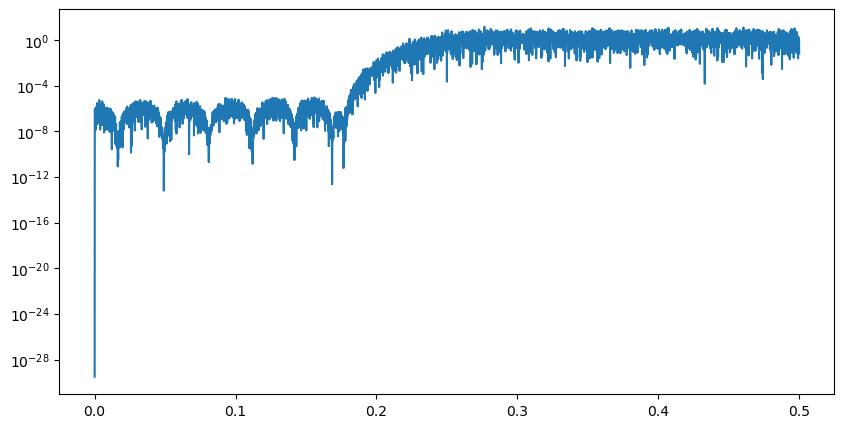

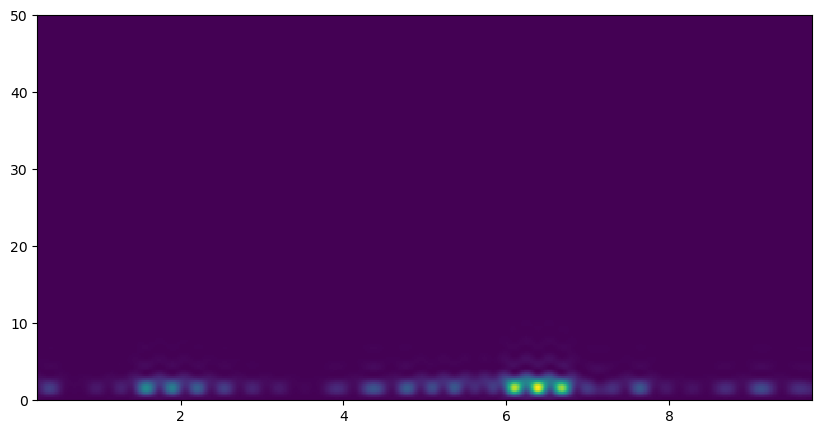

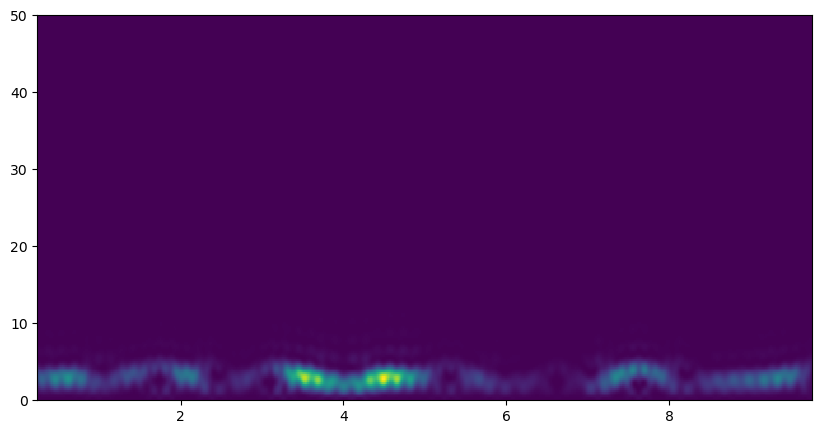

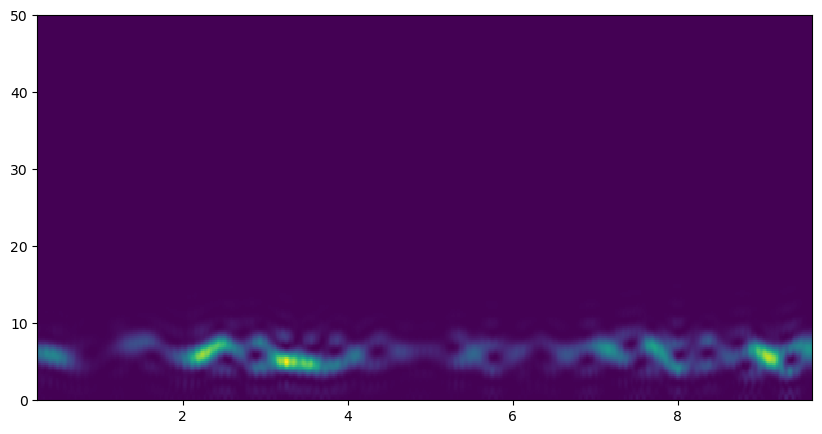

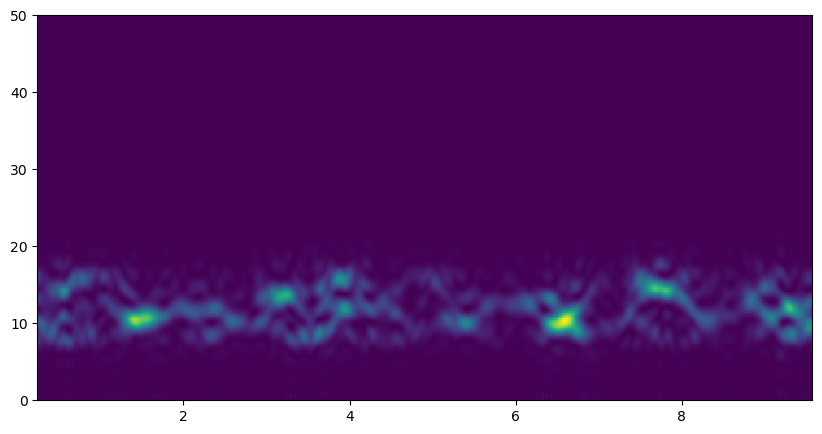

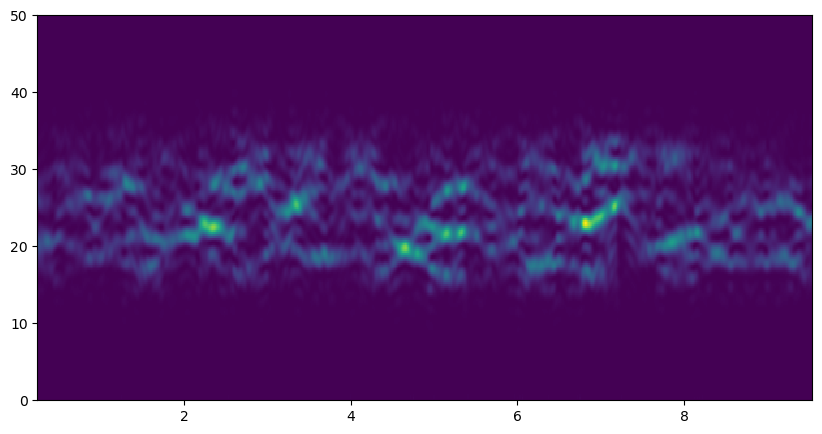

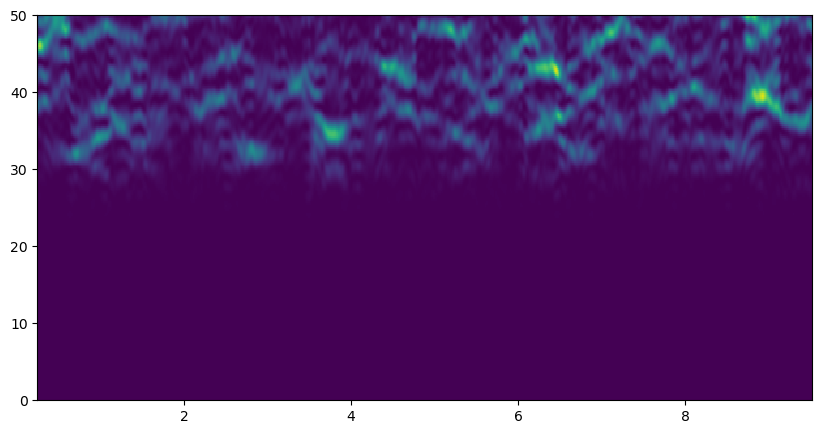

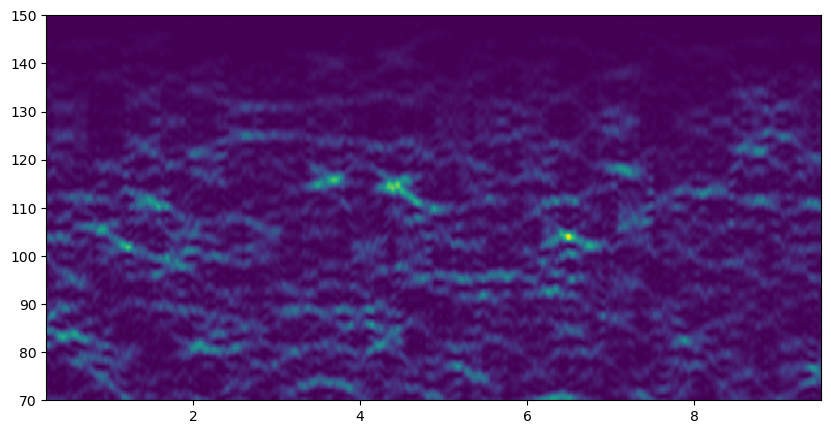

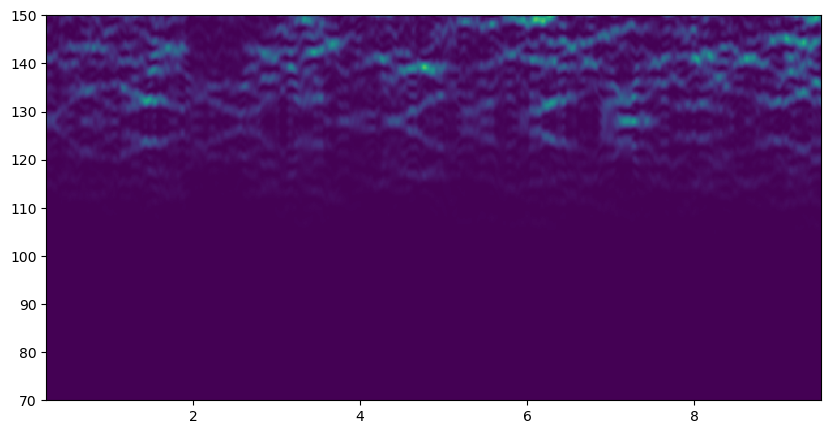

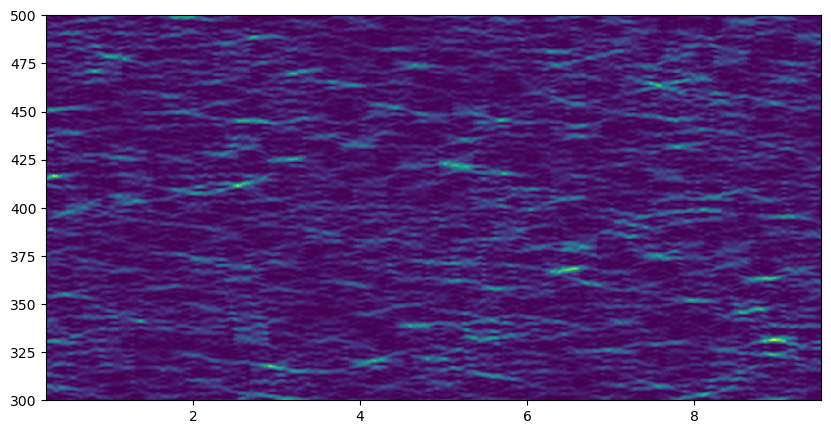

In [122]:
perebor(ND, 'dmey', 8)

In [214]:
def perebor_wpd(data, wvl, level = 3):
    
    res = pywt.WaveletPacket(data, wavelet = wvl, mode='periodization', maxlevel = level)
    a = [node.path for node in res.get_level(level, 'freq')]
    lv = []
    for i in range(len(a)):
        new_res = pywt.WaveletPacket(data=None, wavelet=wvl, mode='periodization', maxlevel = level)
        new_res[a[i]] = res[a[i]].data
        new_res.reconstruct(update = True)
        lv.append(new_res.data)
        
    for i in lv:
        plt.figure(figsize = (10, 5))
        plt.plot(ND, c = 'k')
        plt.plot(i, c = 'r')
        plt.show()

        plt.figure(figsize = (10, 5))
        pd2, pdden2 = signal.periodogram(i)
        plt.semilogy(pd2, pdden2, c= 'r')
        plt.show()

    fs = 1/(t[1]-t[0])

    for i in range(len(lv)):
        f, tx, Sxx = signal.spectrogram(lv[i], fs, nperseg = 4096, noverlap = 4096/2)
        plt.figure(figsize = (10, 5))
        plt.pcolormesh(tx, f, Sxx, shading='auto', cmap = 'magma')


WPD haar

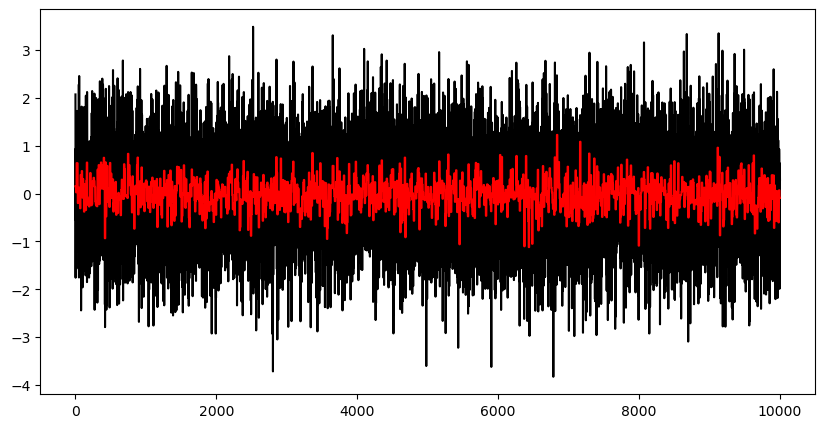

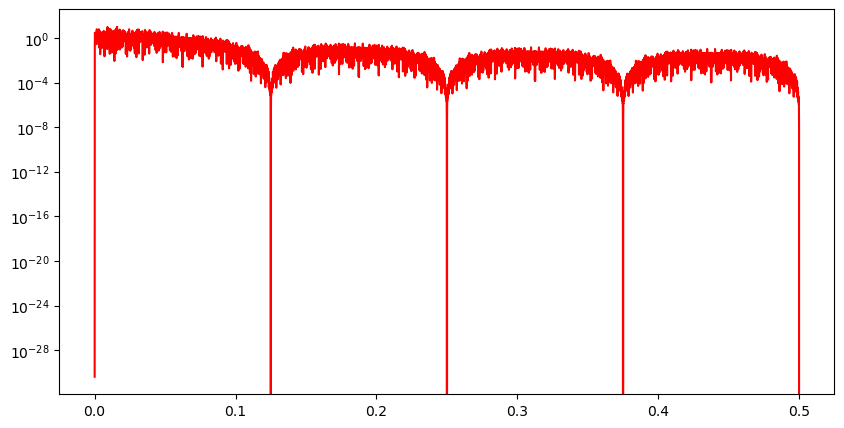

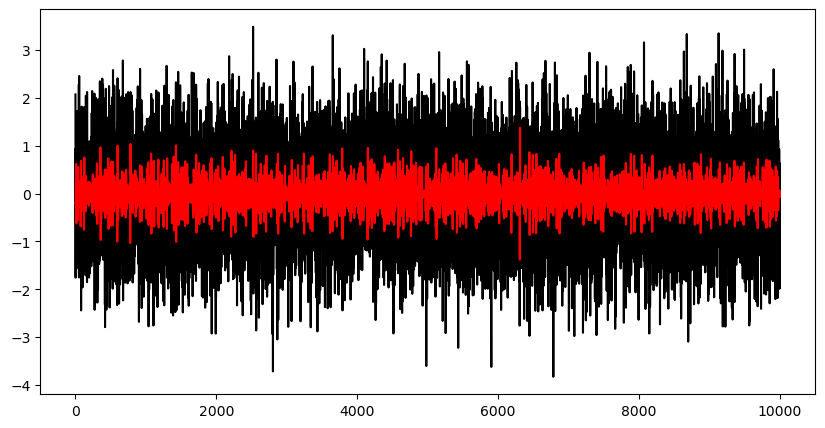

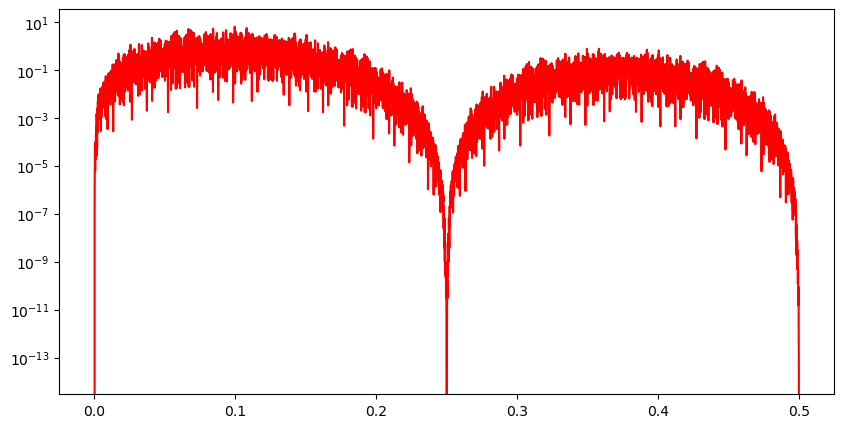

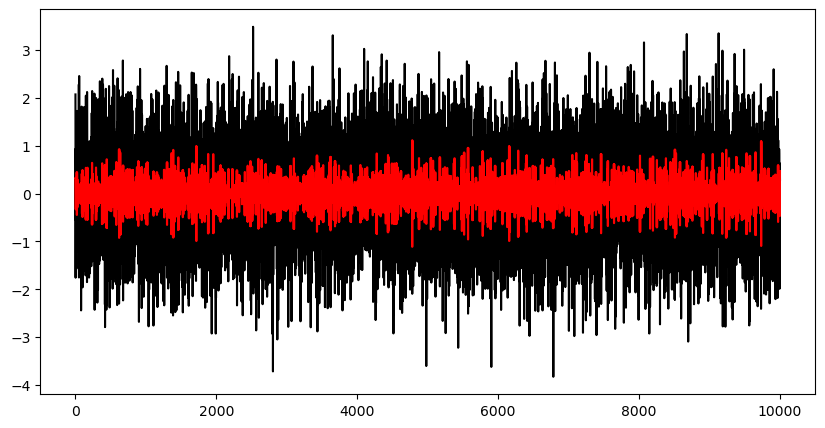

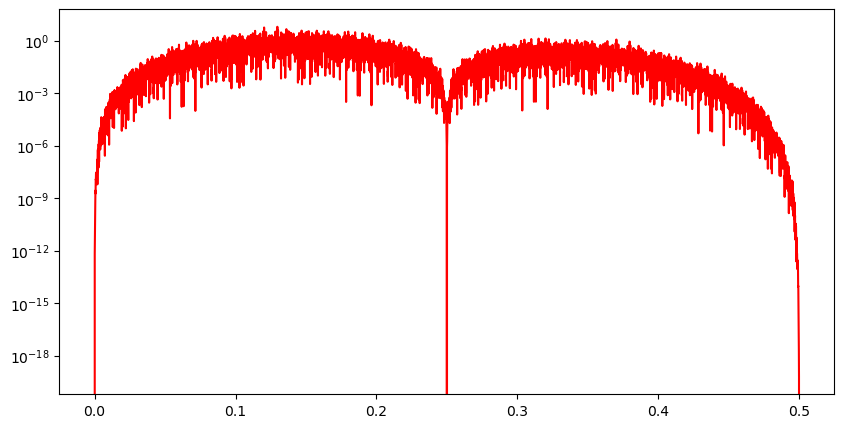

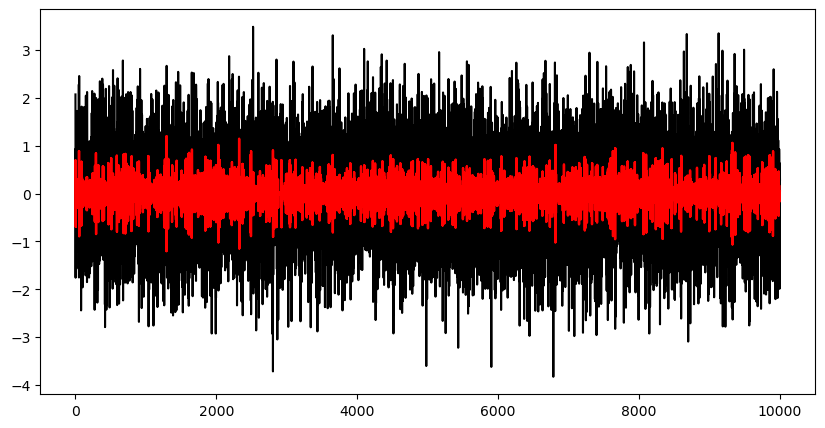

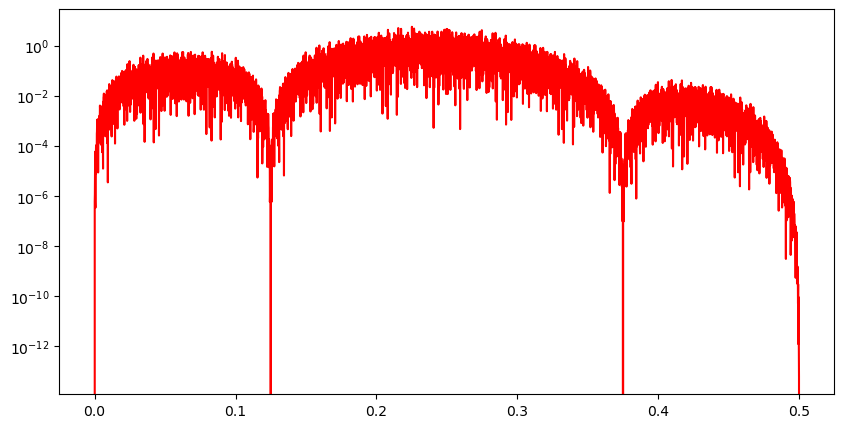

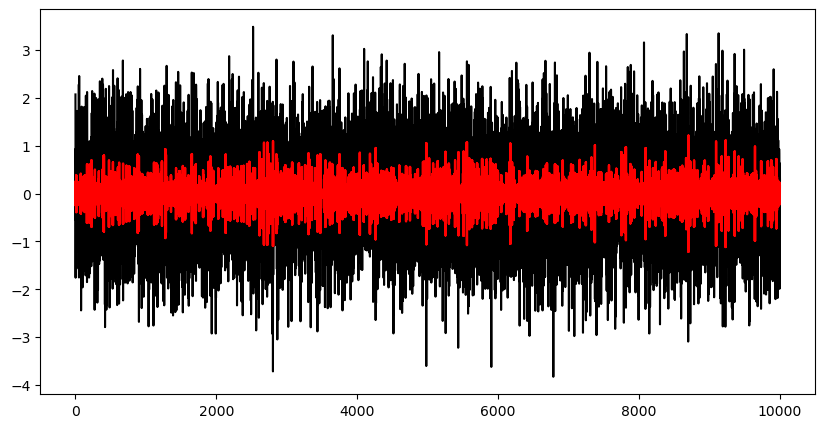

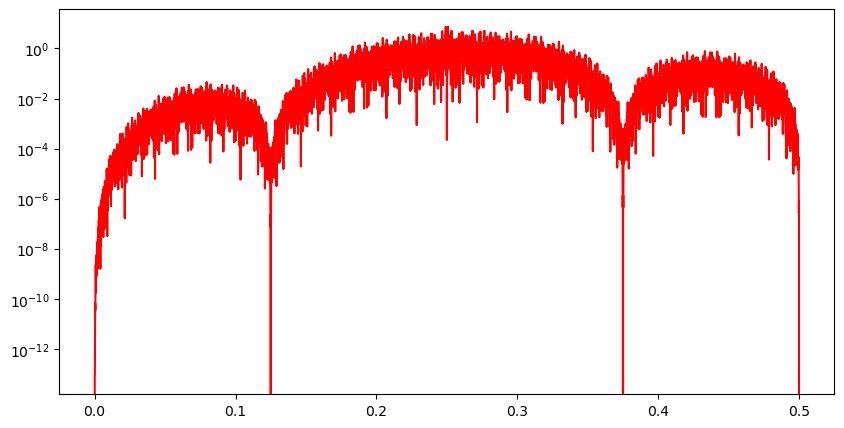

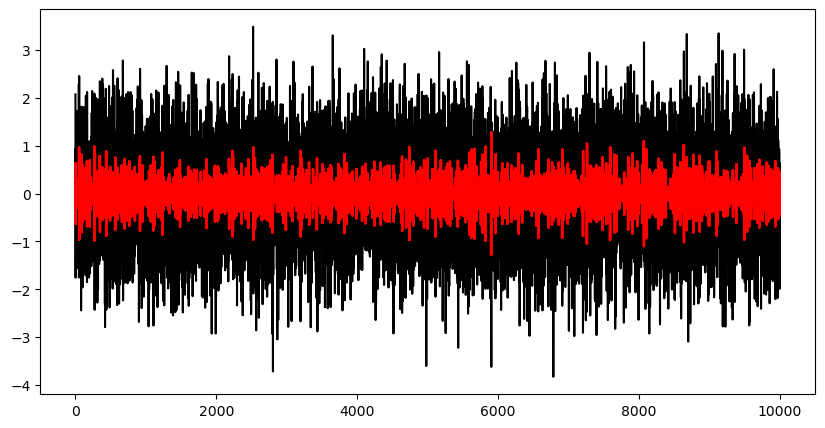

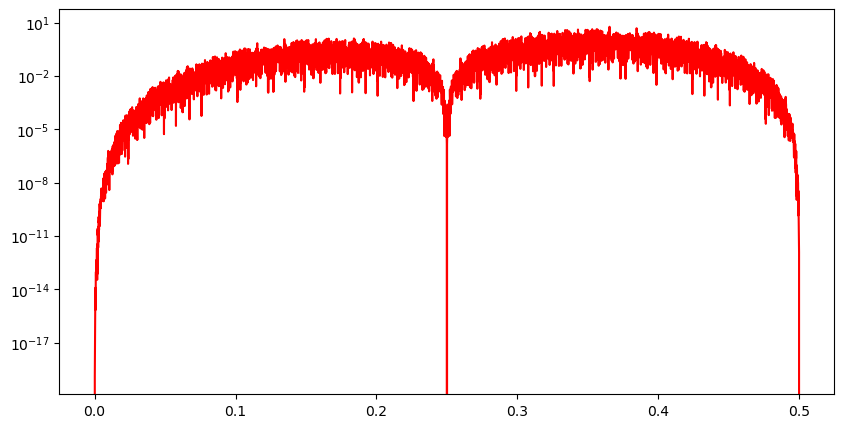

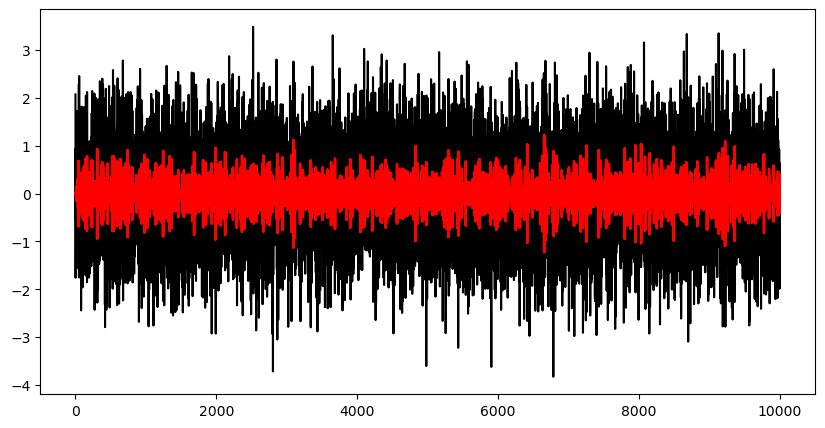

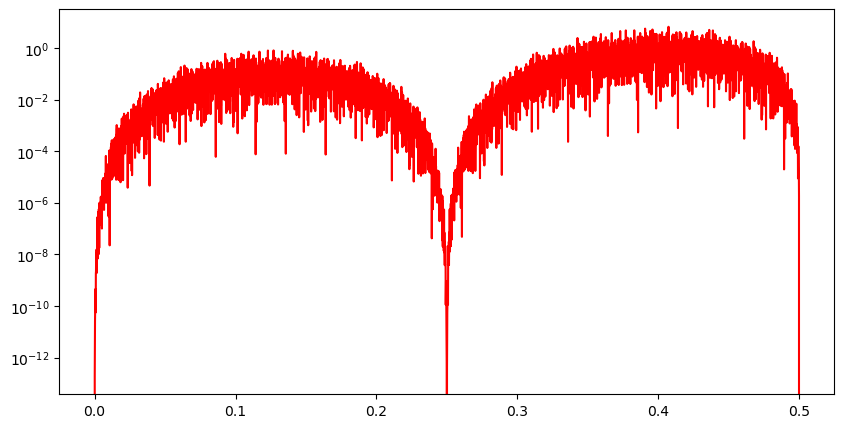

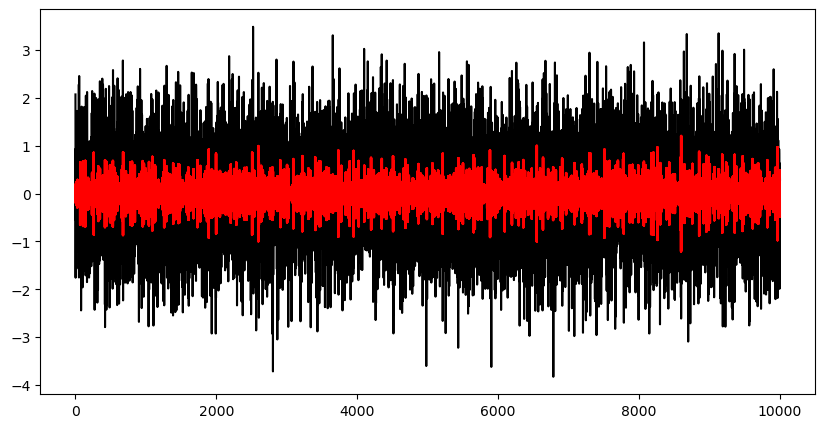

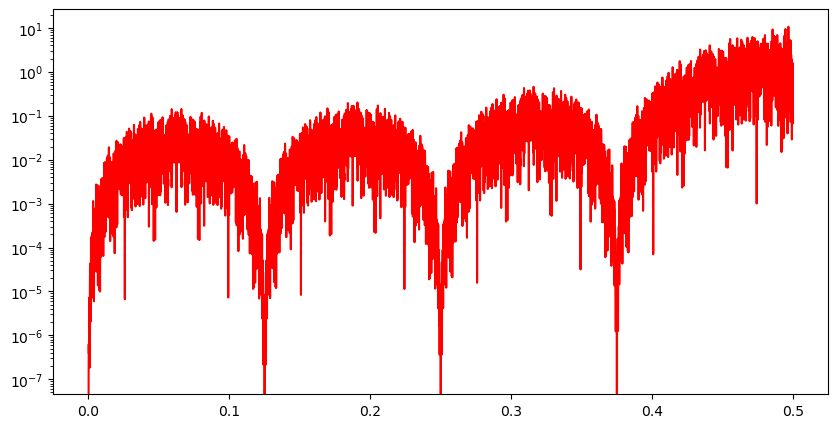

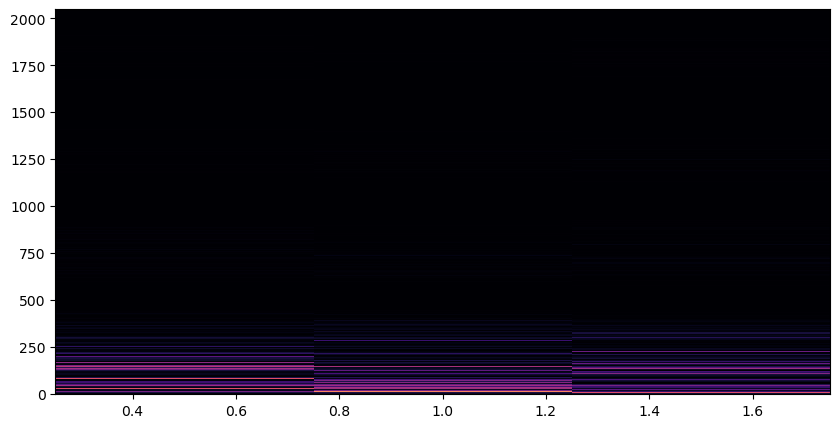

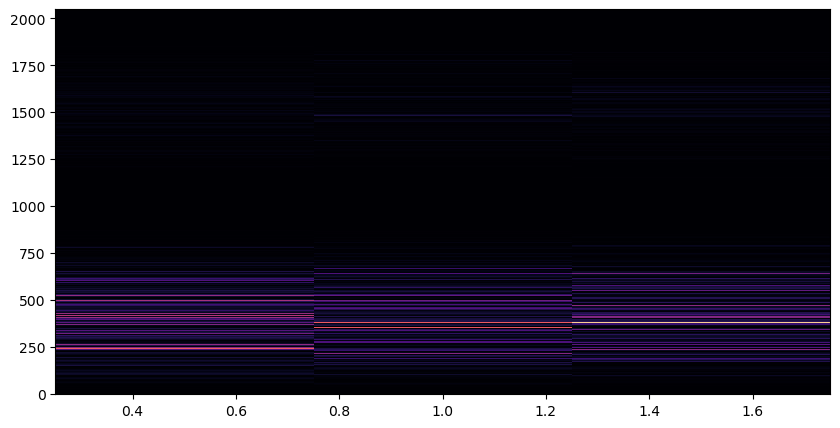

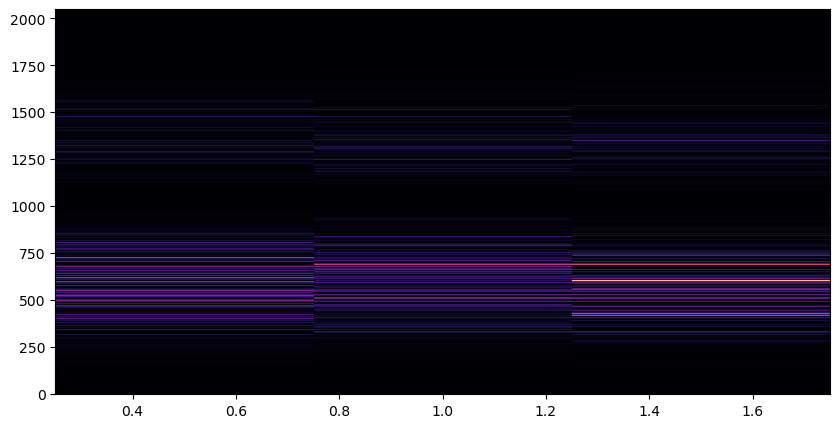

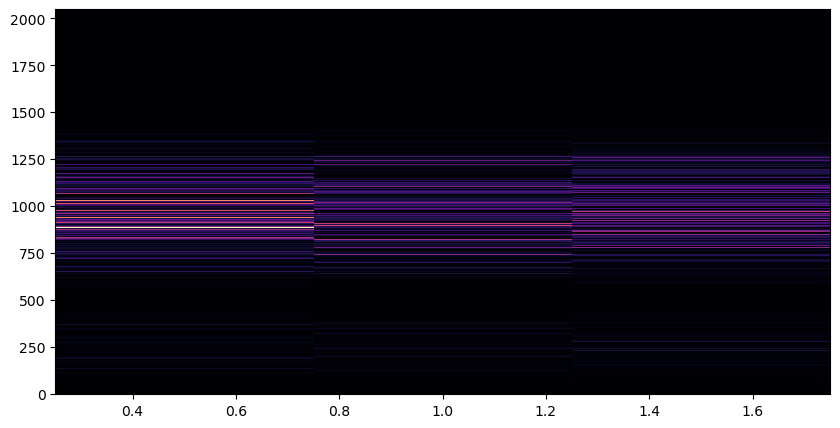

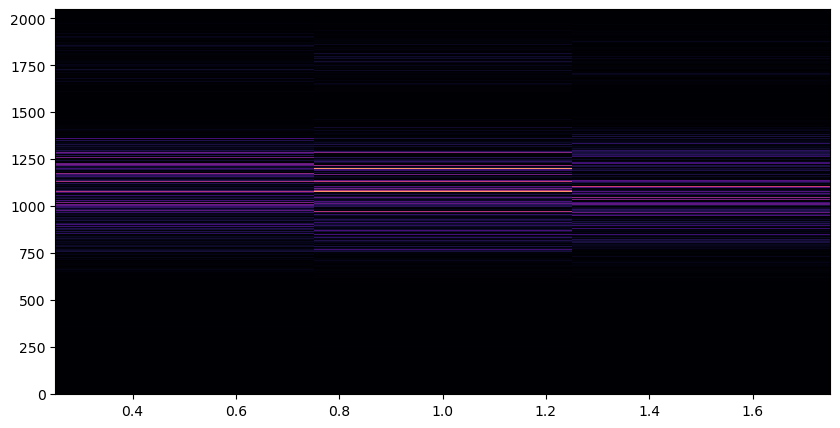

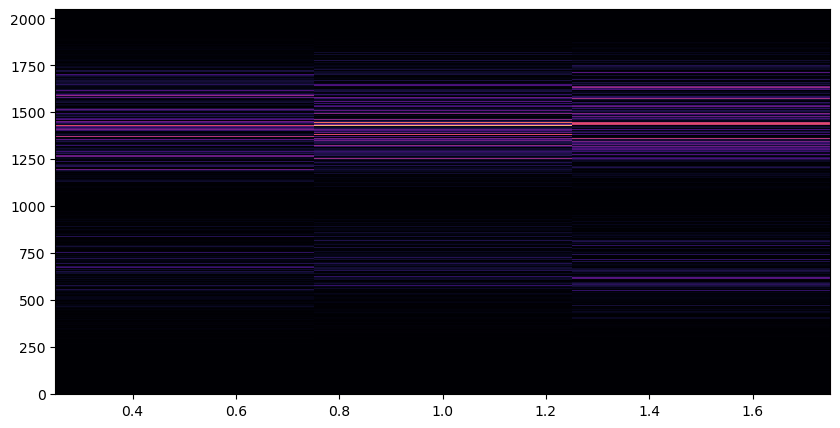

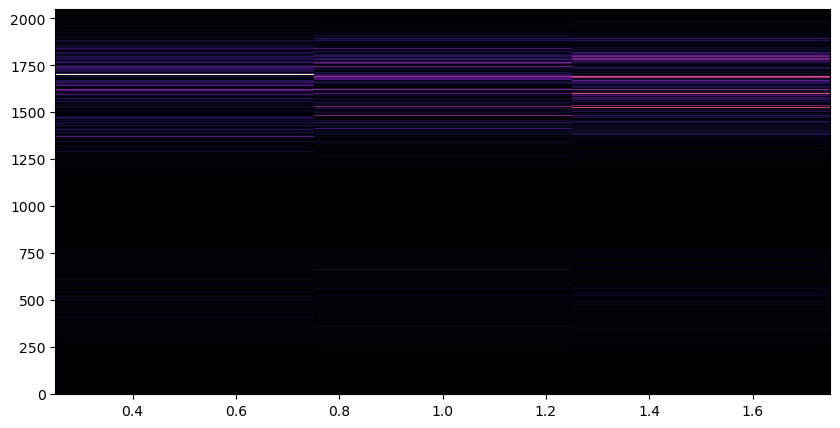

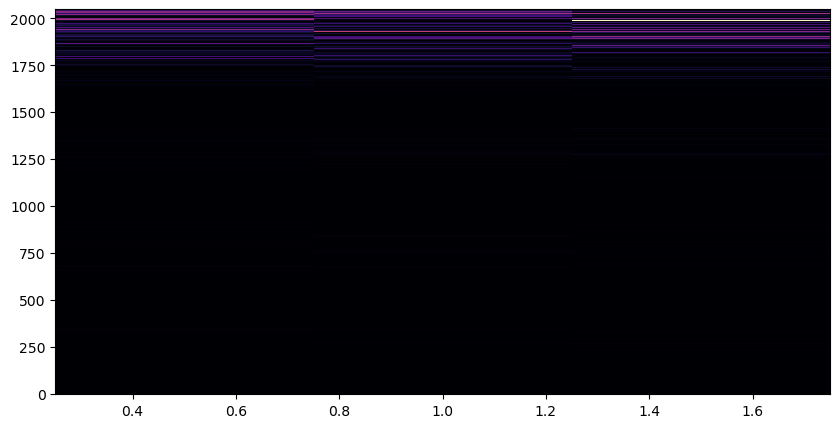

In [215]:
perebor_wpd(ND, 'haar')

WPD dmey

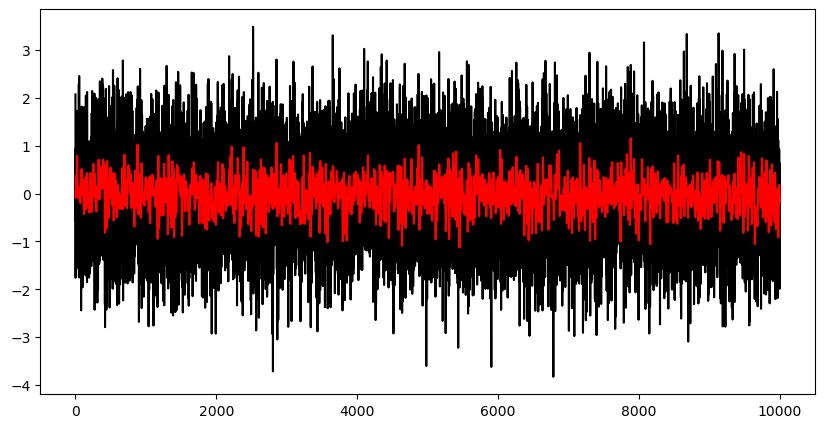

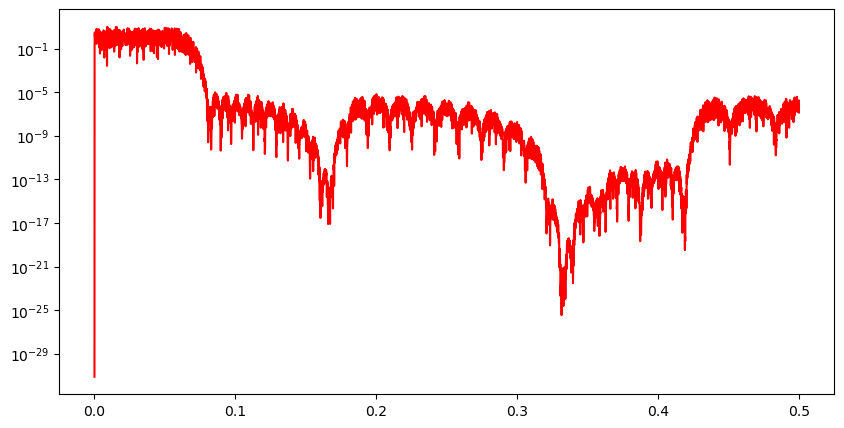

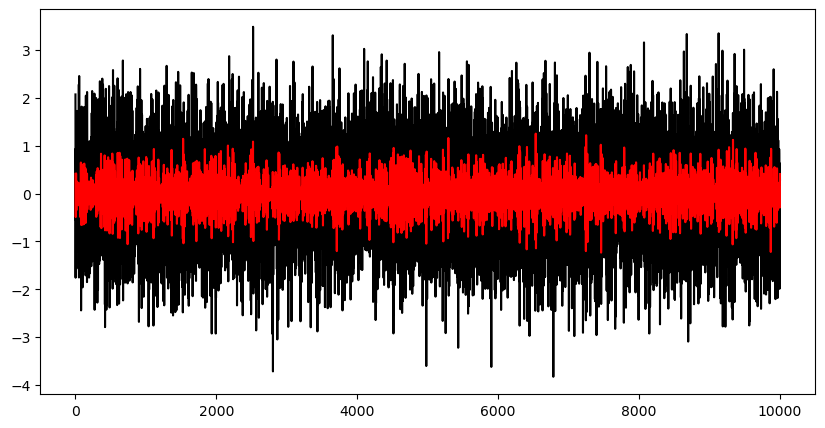

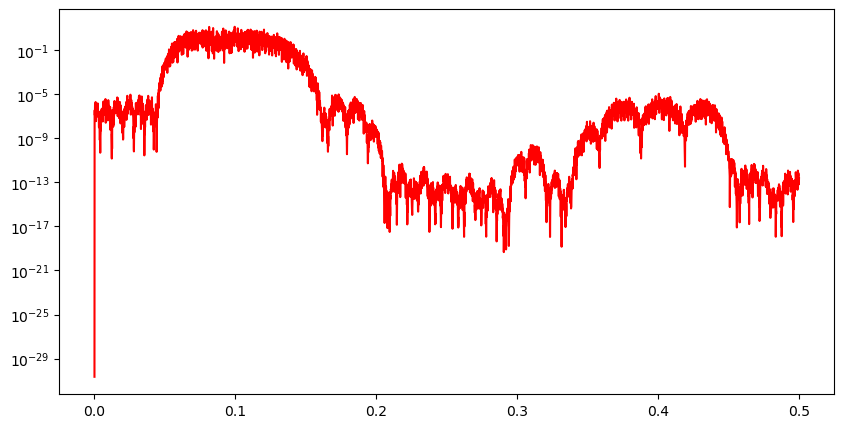

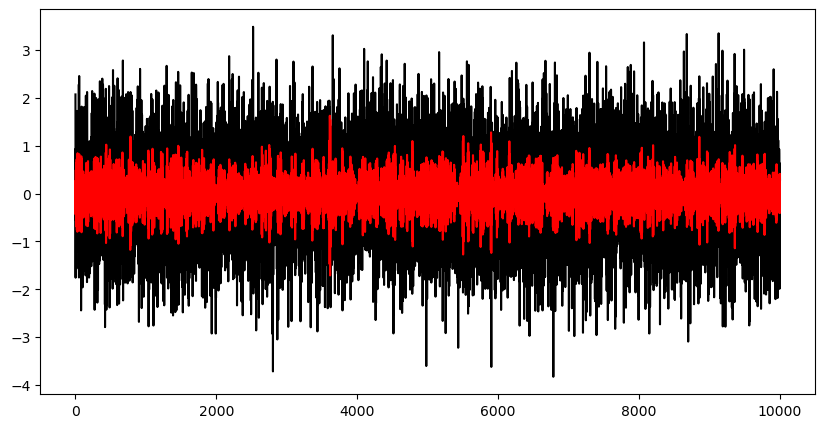

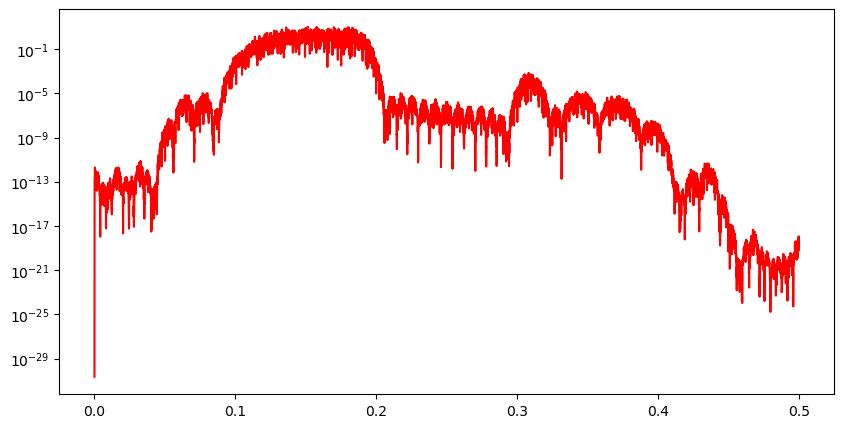

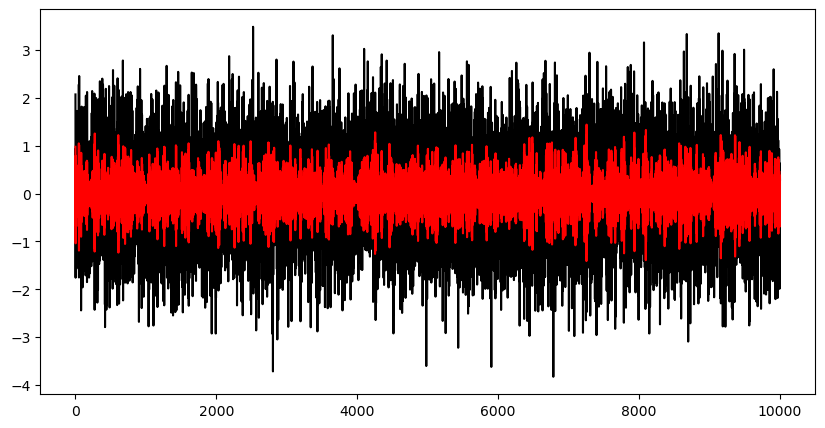

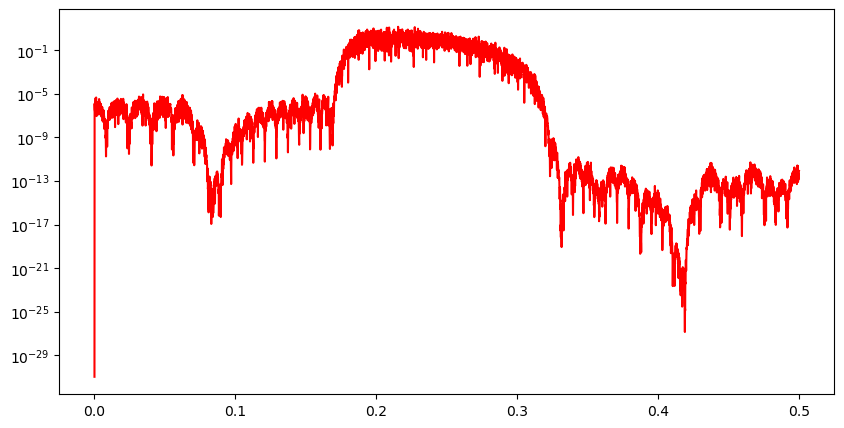

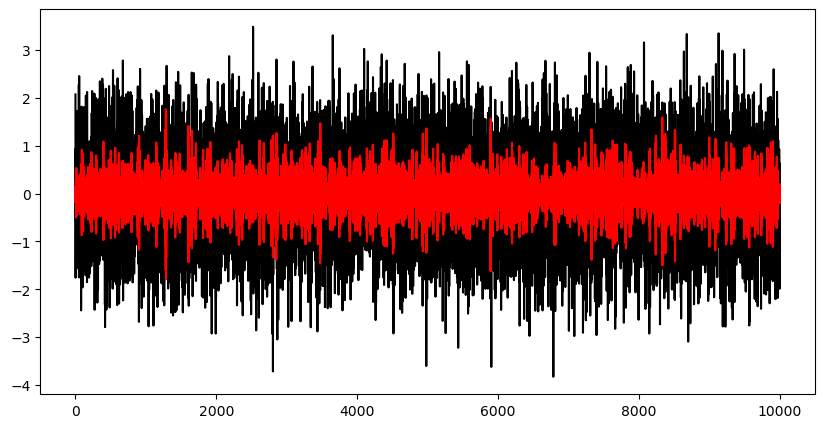

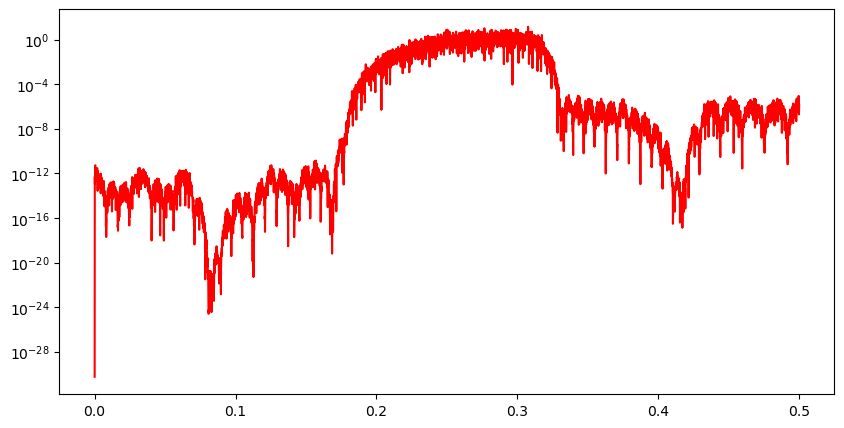

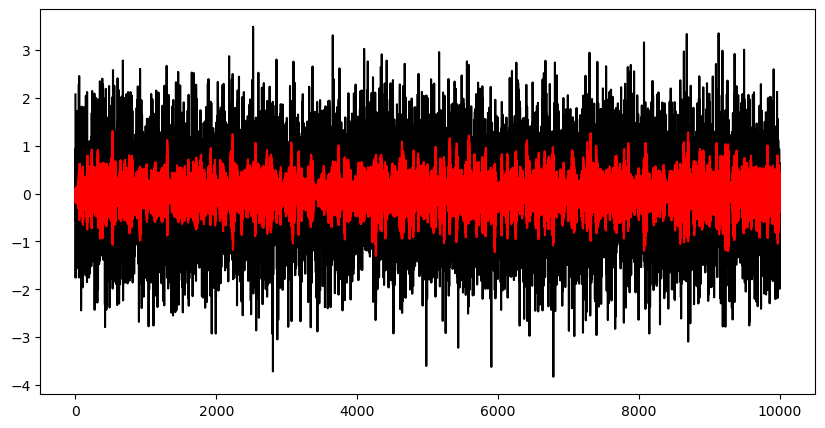

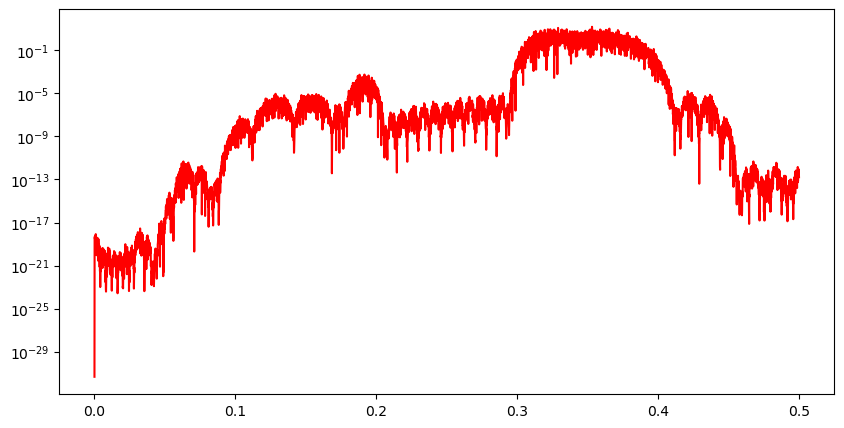

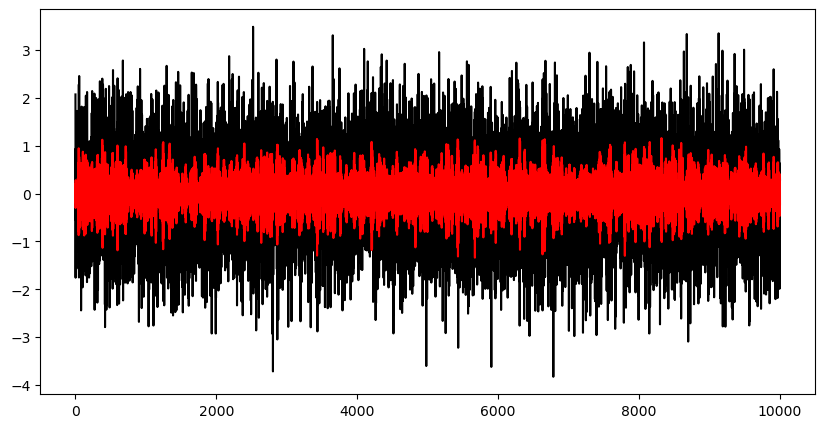

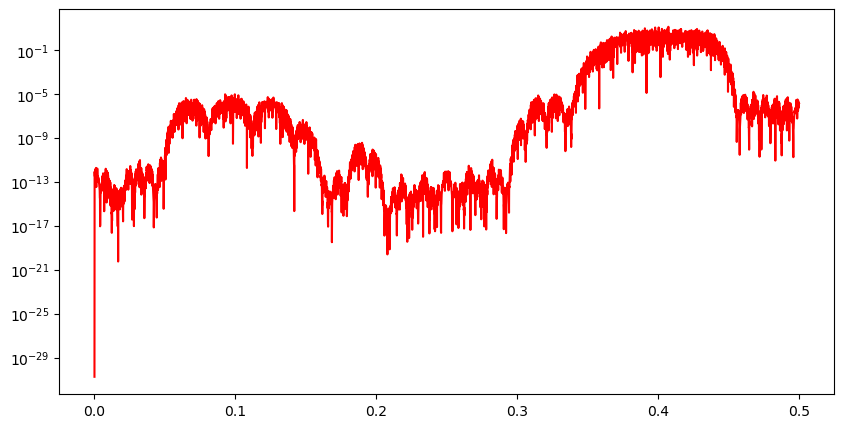

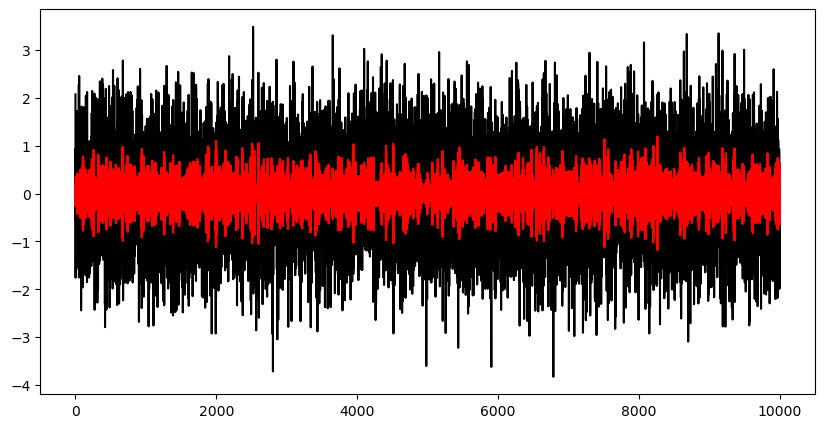

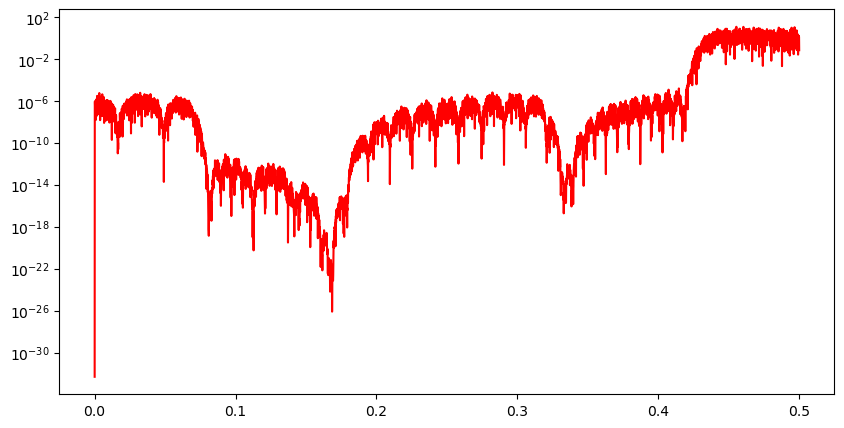

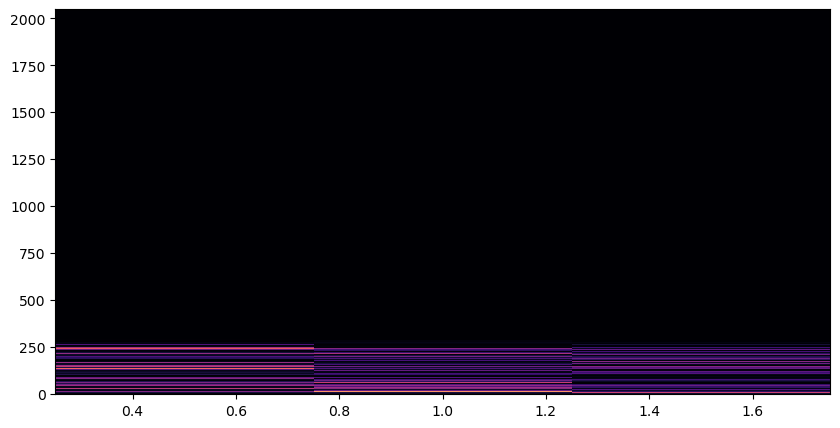

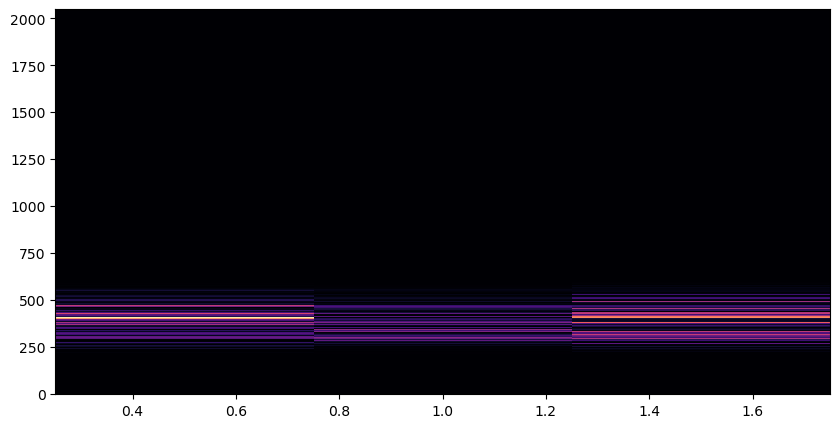

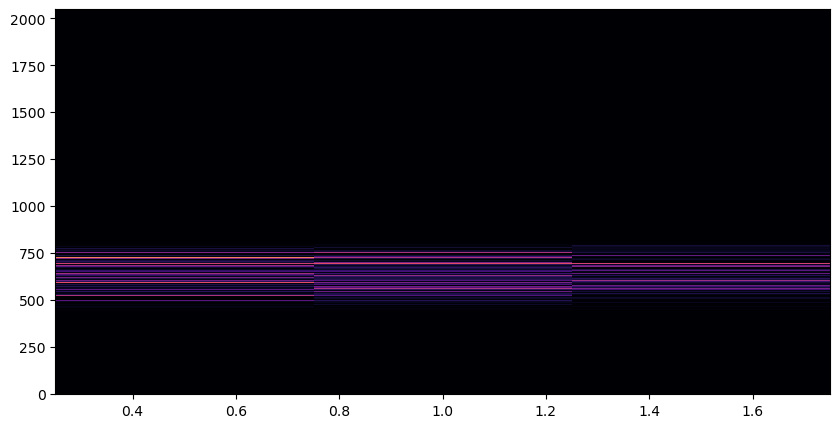

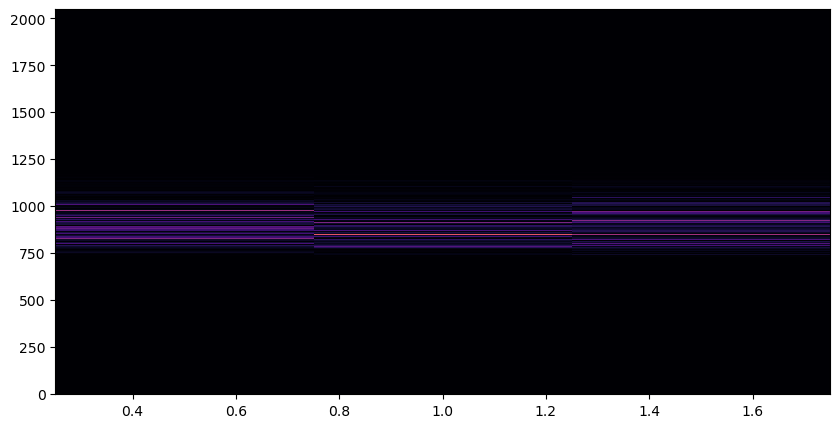

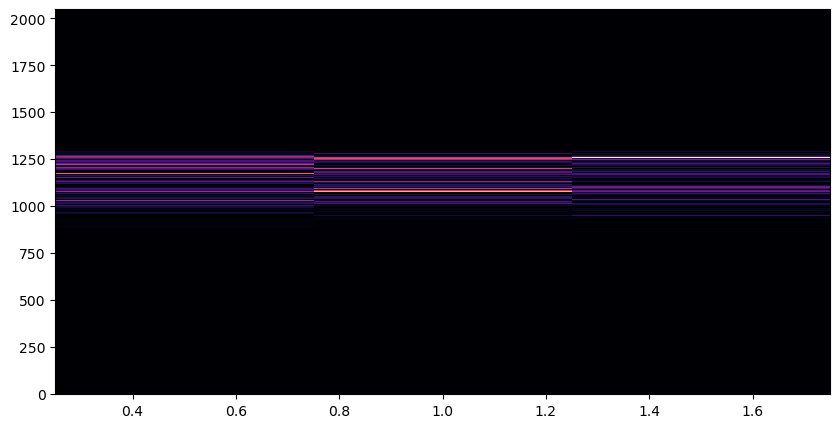

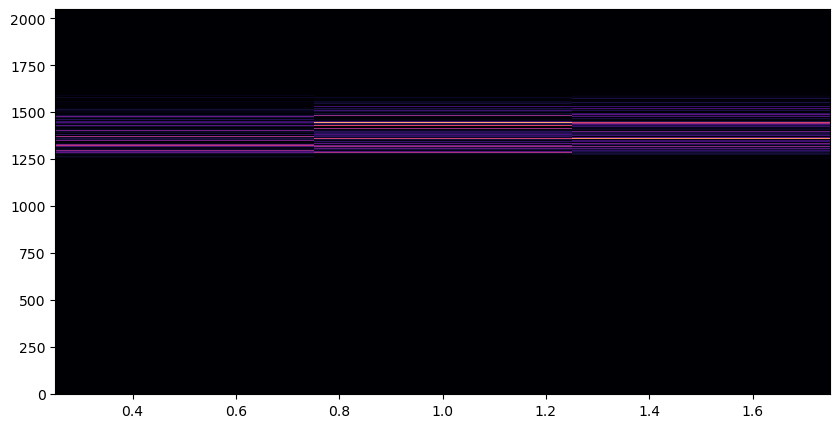

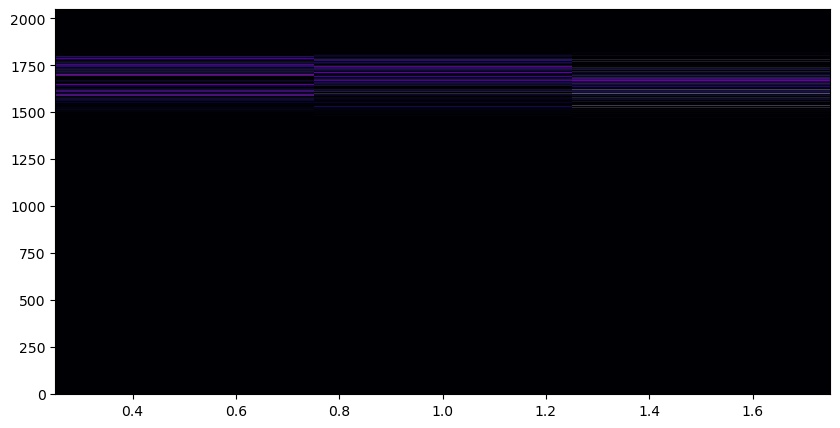

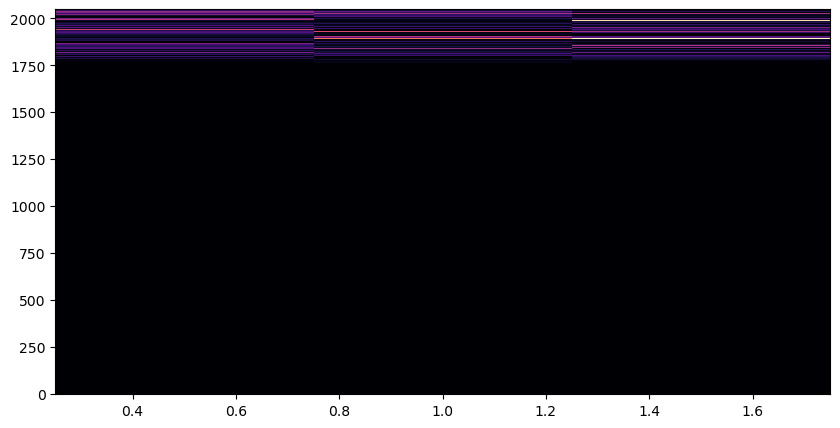

In [216]:
perebor_wpd(ND, 'dmey')

24 задание

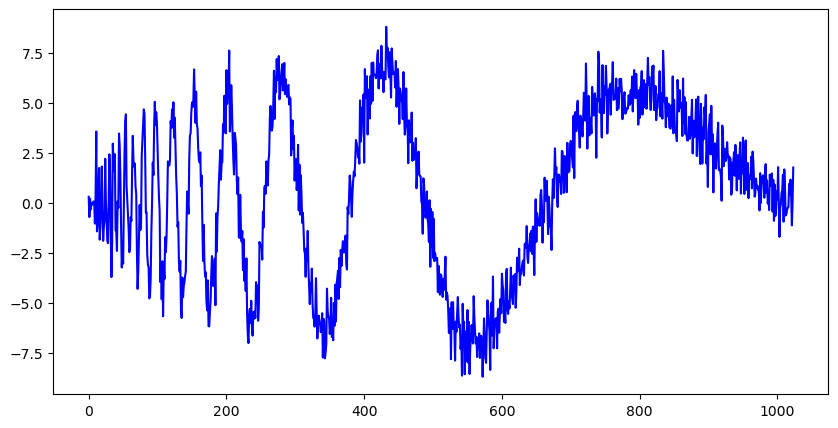

In [35]:
file = h5py.File('Data/doppler.mat','r')
data = file.get('data')
data = np.array(data)
data = data.ravel()
plt.figure(figsize = (10, 5))
plt.plot(data, 'b')
plt.show()

25 задание

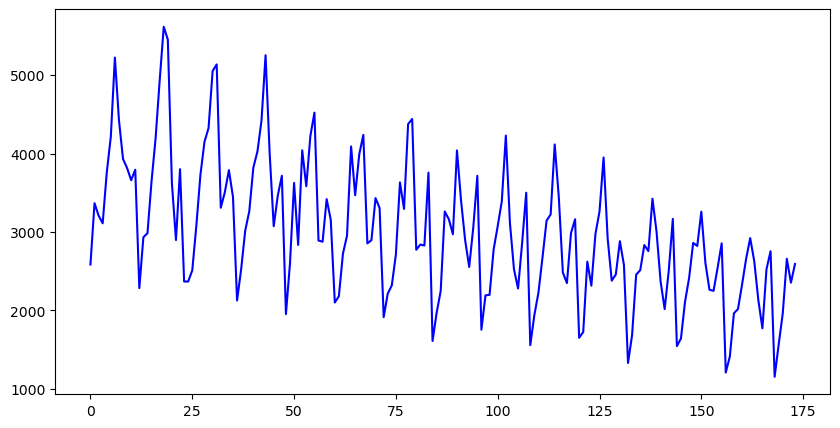

In [36]:
file = h5py.File('Data/Fort.mat','r')
Z = file.get('Fort')
Z = np.array(Z)
Z = Z.ravel()
plt.figure(figsize = (10, 5))
plt.plot(Z, 'b')
plt.show()
